# Wind Energy Prediction and Analysis

## Importing Basic Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import time

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})

### Reading the dataset

In [51]:
data = pd.read_csv("../input/wind-turbine-scada-dataset/T1.csv")
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


## Data Wrangling

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [53]:
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [54]:
data.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

## Visualization

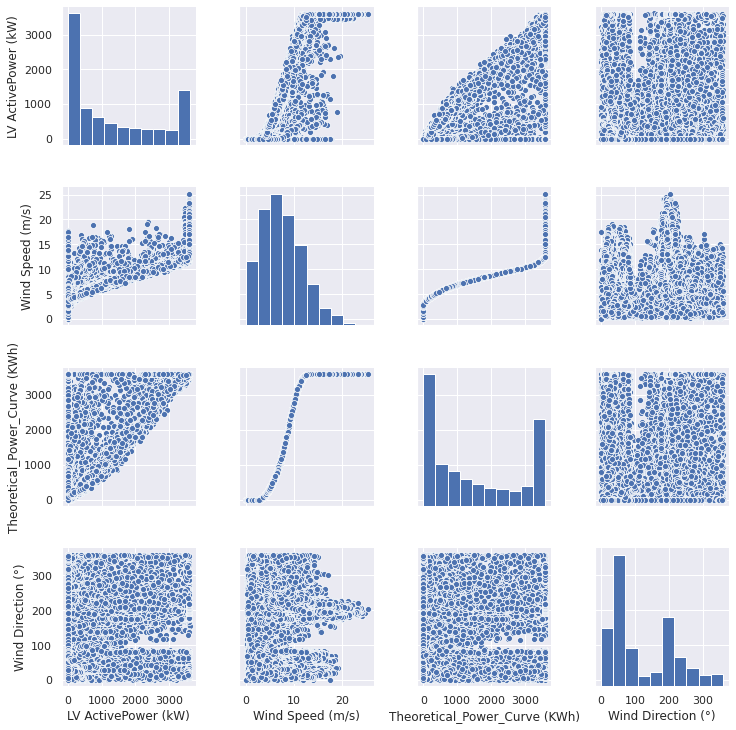

In [55]:
# Pair Plot correlation between all attributes
sns.pairplot(data)

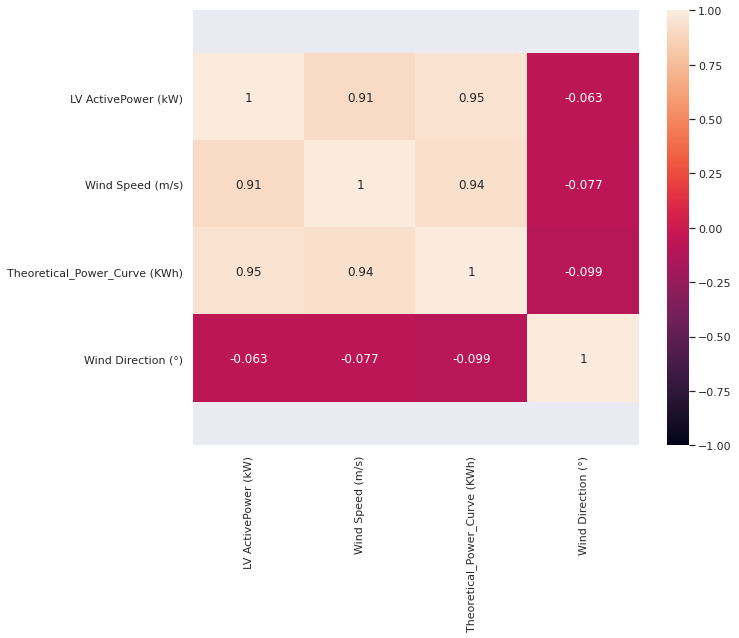

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
LV ActivePower (kW),1.000000,0.912774,0.949918,-0.062702
Wind Speed (m/s),0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000,-0.099076
Wind Direction (°),-0.062702,-0.077188,-0.099076,1.000000


In [56]:
#correlation between the values
corr = data.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

In [57]:
# Importing a visualization library
! pip install windrose

### Pie Bar Chart (Wind Direction VS Wind Speed)

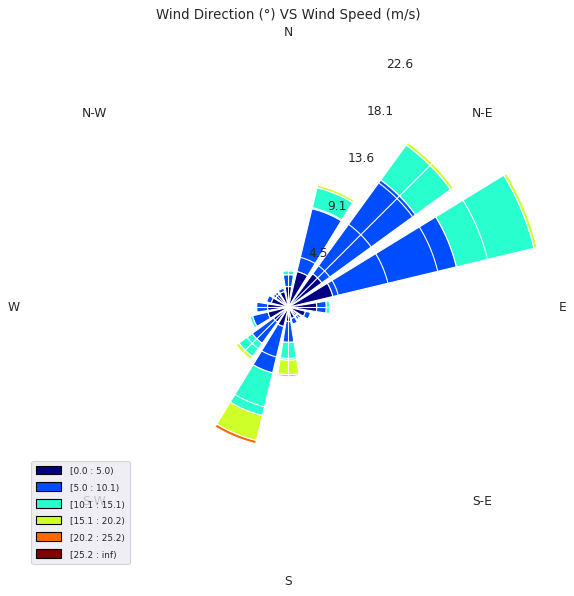

In [60]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(data['Wind Direction (°)'], data['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Direction (°) VS Wind Speed (m/s)")
plt.show()

In [10]:
# Spliting the date time in year, month, days, hours and minutes
data['Year']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[0])
data['Month']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[1])
data['Day']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[2])
data['Time_Hours']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[3])
data['Time_Minutes']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[4])
data.head(10)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Day,Time_Hours,Time_Minutes
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,2018,1,1,0,50
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605,2018,1,1,1,0
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493,2018,1,1,1,10
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698,2018,1,1,1,20
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785,2018,1,1,1,30


### KDE Plot

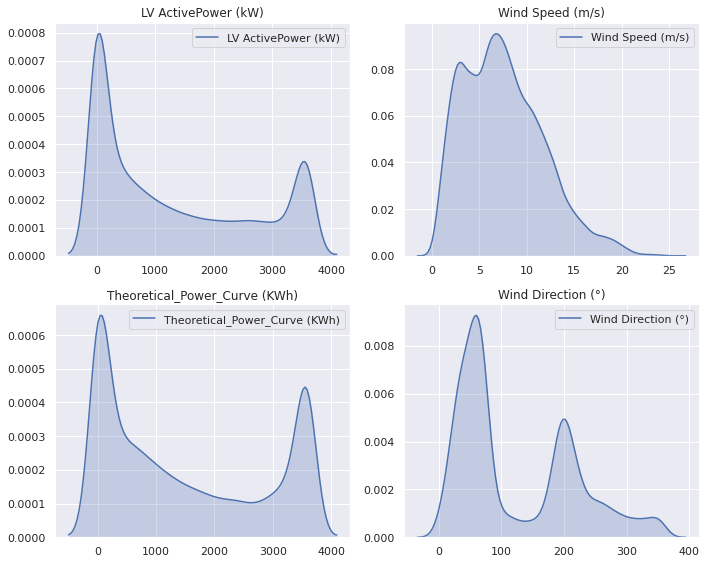

In [11]:
#plotting the data distribution
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data.iloc[:,i+1], shade=True)
    plt.title(data.columns[i+1])
plt.tight_layout()
plt.show()

In [12]:
# droping all the null values from the data
data = data.dropna()

## Converting the Data/Time feature in proper DateTime format

In [13]:
data["Date/Time"] = pd.to_datetime(data["Date/Time"], format = "%d %m %Y %H:%M", errors = "coerce")
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Day,Time_Hours,Time_Minutes
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40
...,...,...,...,...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,2018,12,31,23,10
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,2018,12,31,23,20
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,2018,12,31,23,30
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,2018,12,31,23,40


### Line Graph of DateTime VS Target variable

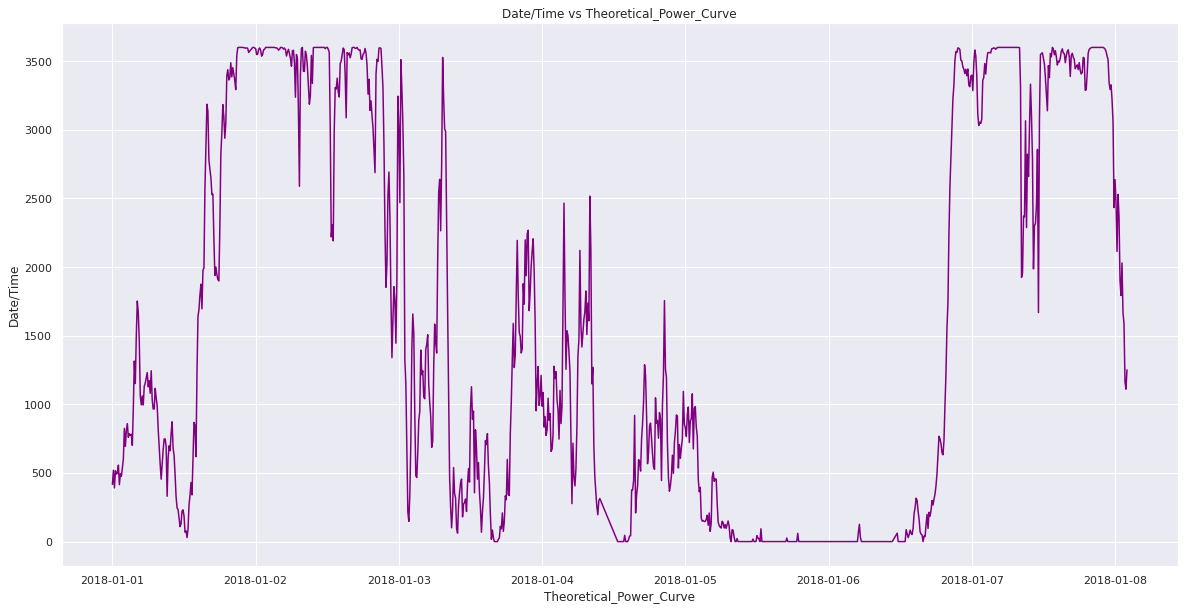

In [46]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20,10))

# Add x-axis and y-axis
ax.plot(data['Date/Time'][0:1000],
        data['Theoretical_Power_Curve (KWh)'][0:1000],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Theoretical_Power_Curve",
       ylabel="Date/Time",
       title="Date/Time vs Theoretical_Power_Curve")

plt.show()

In [15]:
# Droping all the irrelavent features that dosent affect the target variable.
cols = ["Wind Direction (°)", 'Year', 'Month', "Day", "Time_Hours", "Time_Minutes" ]
data = data.drop(cols, axis=1)
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972


In [16]:
df = data.copy()

# Building the LSTM model

In [17]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """
Using TensorFlow backend.


In [18]:
# converting the Data/Time as the index for proper shape of the input.
df = df.set_index('Date/Time')

In [19]:
# Hardcode all variables
batch_size_exp = 1
epoch_exp = 15
neurons_exp = 10
predict_values_exp = 15000
lag_exp=24

In [20]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [21]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [22]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [23]:
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [24]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [25]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model
    print(model.summary)

In [26]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [27]:
'''Drop all the features as we will not be having any in production'''
del df['LV ActivePower (kW)']
del df['Wind Speed (m/s)']
df.head()

,Theoretical_Power_Curve (KWh)
Date/Time,
2018-01-01 00:00:00,416.328908
2018-01-01 00:10:00,519.917511
2018-01-01 00:20:00,390.900016
2018-01-01 00:30:00,516.127569
2018-01-01 00:40:00,491.702972


In [28]:
for i in range(0,10):
  df = df[:-1]
df.tail()

,Theoretical_Power_Curve (KWh)
Date/Time,
2018-12-31 21:30:00,1811.263260
2018-12-31 21:40:00,1787.100338
2018-12-31 21:50:00,2777.504103
2018-12-31 22:00:00,3025.199012
2018-12-31 22:10:00,3161.693967


In [29]:
# transform data to be stationary
raw_values = df.values
diff_values = difference(raw_values, 1)

In [30]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values

In [31]:
# split data into train and test-sets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

In [32]:
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [33]:
# fit the model
lstm_model = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp)

35519/35519 [==============================] - 86s 2ms/step - loss: 0.0053


In [34]:
# walk-forward validation on the test data
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)#batch_size_exp to 1
    '''# Start Debug prints
    print("X: %", X)
    print("yhat: %", yhat)
    # End Debug prints'''
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred 
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Hour=1, Predicted=351.722357, Expected=295.639923
Hour=2, Predicted=291.646806, Expected=183.483743
Hour=3, Predicted=207.553847, Expected=275.264635
Hour=4, Predicted=290.644693, Expected=400.402729
Hour=5, Predicted=406.459026, Expected=386.280476
Hour=6, Predicted=389.061276, Expected=559.700254
Hour=7, Predicted=560.541582, Expected=735.450687
Hour=8, Predicted=732.087032, Expected=741.068076
Hour=9, Predicted=741.558315, Expected=550.819636
Hour=10, Predicted=545.502099, Expected=203.429101
Hour=11, Predicted=195.860966, Expected=101.136983
Hour=12, Predicted=95.088828, Expected=41.767289
Hour=13, Predicted=33.751089, Expected=95.762290
Hour=14, Predicted=90.831862, Expected=280.589878
Hour=15, Predicted=277.821482, Expected=207.208663
Hour=16, Predicted=206.616731, Expected=163.496514
Hour=17, Predicted=157.924393, Expected=244.369382
Hour=18, Predicted=238.205688, Expected=365.132286
Hour=19, Predicted=358.566134, Expected=418.764305
Hour=20, Predicted=412.044540, Expected=264.9

Hour=163, Predicted=-1.906787, Expected=0.000000
Hour=164, Predicted=-1.906784, Expected=0.000000
Hour=165, Predicted=-1.906784, Expected=0.000000
Hour=166, Predicted=-1.906784, Expected=0.000000
Hour=167, Predicted=-1.906787, Expected=0.000000
Hour=168, Predicted=-1.906791, Expected=0.000000
Hour=169, Predicted=-1.906791, Expected=0.000000
Hour=170, Predicted=-1.906787, Expected=0.000000
Hour=171, Predicted=-1.906787, Expected=0.000000
Hour=172, Predicted=-1.906789, Expected=0.000000
Hour=173, Predicted=-1.906789, Expected=0.000000
Hour=174, Predicted=-1.906789, Expected=0.000000
Hour=175, Predicted=-1.906791, Expected=0.000000
Hour=176, Predicted=-1.906792, Expected=0.000000
Hour=177, Predicted=-1.906789, Expected=0.000000
Hour=178, Predicted=-1.906791, Expected=33.777910
Hour=179, Predicted=31.871123, Expected=16.481954
Hour=180, Predicted=14.575165, Expected=28.582396
Hour=181, Predicted=26.675612, Expected=0.000000
Hour=182, Predicted=-1.906787, Expected=0.000000
Hour=183, Predict

Hour=331, Predicted=200.490790, Expected=133.782110
Hour=332, Predicted=131.875321, Expected=280.096080
Hour=333, Predicted=278.189296, Expected=196.603660
Hour=334, Predicted=194.696872, Expected=243.327690
Hour=335, Predicted=241.420898, Expected=261.598132
Hour=336, Predicted=259.691339, Expected=240.574033
Hour=337, Predicted=238.667243, Expected=289.920246
Hour=338, Predicted=288.013455, Expected=302.690255
Hour=339, Predicted=300.783467, Expected=191.697343
Hour=340, Predicted=189.790556, Expected=159.665048
Hour=341, Predicted=157.758262, Expected=135.651541
Hour=342, Predicted=133.744754, Expected=127.257563
Hour=343, Predicted=125.350771, Expected=151.564008
Hour=344, Predicted=149.657216, Expected=189.444032
Hour=345, Predicted=187.537239, Expected=157.215030
Hour=346, Predicted=155.308239, Expected=139.667784
Hour=347, Predicted=137.760996, Expected=217.561589
Hour=348, Predicted=215.654800, Expected=240.679577
Hour=349, Predicted=238.772788, Expected=213.813285
Hour=350, Pr

Hour=492, Predicted=743.188462, Expected=525.700174
Hour=493, Predicted=523.793385, Expected=762.034867
Hour=494, Predicted=760.128077, Expected=561.573971
Hour=495, Predicted=559.667184, Expected=576.088209
Hour=496, Predicted=574.181422, Expected=664.632572
Hour=497, Predicted=662.725788, Expected=777.151843
Hour=498, Predicted=775.245055, Expected=1068.905520
Hour=499, Predicted=1066.998734, Expected=521.080142
Hour=500, Predicted=519.173354, Expected=705.682927
Hour=501, Predicted=703.776141, Expected=925.561936
Hour=502, Predicted=923.655149, Expected=1237.211556
Hour=503, Predicted=1235.304769, Expected=1214.982618
Hour=504, Predicted=1213.075831, Expected=1016.306735
Hour=505, Predicted=1014.399948, Expected=1156.757203
Hour=506, Predicted=1154.850415, Expected=1016.591664
Hour=507, Predicted=1014.684876, Expected=804.072009
Hour=508, Predicted=802.165220, Expected=577.403856
Hour=509, Predicted=575.497068, Expected=466.389906
Hour=510, Predicted=464.483117, Expected=409.582386


Hour=655, Predicted=110.736210, Expected=83.365778
Hour=656, Predicted=81.458991, Expected=271.867828
Hour=657, Predicted=269.961040, Expected=316.263710
Hour=658, Predicted=314.356923, Expected=429.571326
Hour=659, Predicted=427.664537, Expected=560.936049
Hour=660, Predicted=559.029260, Expected=692.758947
Hour=661, Predicted=690.852158, Expected=733.425665
Hour=662, Predicted=731.518876, Expected=988.605525
Hour=663, Predicted=986.698736, Expected=1052.764294
Hour=664, Predicted=1050.857501, Expected=922.256526
Hour=665, Predicted=920.349737, Expected=1171.714539
Hour=666, Predicted=1169.807749, Expected=1573.764857
Hour=667, Predicted=1571.858068, Expected=1489.044360
Hour=668, Predicted=1487.137572, Expected=1598.824569
Hour=669, Predicted=1596.917785, Expected=1590.668356
Hour=670, Predicted=1588.761568, Expected=1573.761536
Hour=671, Predicted=1571.854749, Expected=1705.904942
Hour=672, Predicted=1703.998153, Expected=1387.402473
Hour=673, Predicted=1385.495684, Expected=1087.55

Hour=821, Predicted=-1.906787, Expected=0.000000
Hour=822, Predicted=-1.906789, Expected=0.000000
Hour=823, Predicted=-1.906789, Expected=0.000000
Hour=824, Predicted=-1.906787, Expected=0.000000
Hour=825, Predicted=-1.906789, Expected=0.000000
Hour=826, Predicted=-1.906789, Expected=0.000000
Hour=827, Predicted=-1.906789, Expected=0.000000
Hour=828, Predicted=-1.906789, Expected=0.000000
Hour=829, Predicted=-1.906789, Expected=24.361791
Hour=830, Predicted=22.454998, Expected=68.229979
Hour=831, Predicted=66.323187, Expected=0.000000
Hour=832, Predicted=-1.906789, Expected=0.000000
Hour=833, Predicted=-1.906787, Expected=0.000000
Hour=834, Predicted=-1.906791, Expected=0.000000
Hour=835, Predicted=-1.906789, Expected=0.000000
Hour=836, Predicted=-1.906791, Expected=0.000000
Hour=837, Predicted=-1.906786, Expected=0.000000
Hour=838, Predicted=-1.906791, Expected=0.000000
Hour=839, Predicted=-1.906791, Expected=0.000000
Hour=840, Predicted=-1.906787, Expected=0.000000
Hour=841, Predicte

Hour=981, Predicted=3528.961967, Expected=3563.390788
Hour=982, Predicted=3561.484001, Expected=3501.031075
Hour=983, Predicted=3499.124286, Expected=3592.488670
Hour=984, Predicted=3590.581881, Expected=3423.822618
Hour=985, Predicted=3421.915830, Expected=3528.705284
Hour=986, Predicted=3526.798497, Expected=3381.423998
Hour=987, Predicted=3379.517210, Expected=3422.984154
Hour=988, Predicted=3421.077370, Expected=3600.000000
Hour=989, Predicted=3598.093213, Expected=3590.465820
Hour=990, Predicted=3588.559033, Expected=3576.190410
Hour=991, Predicted=3574.283621, Expected=3600.000000
Hour=992, Predicted=3598.093213, Expected=3600.000000
Hour=993, Predicted=3598.093211, Expected=3600.000000
Hour=994, Predicted=3598.093213, Expected=3600.000000
Hour=995, Predicted=3598.093211, Expected=3600.000000
Hour=996, Predicted=3598.093211, Expected=3600.000000
Hour=997, Predicted=3598.093213, Expected=3600.000000
Hour=998, Predicted=3598.093213, Expected=3595.982191
Hour=999, Predicted=3594.075

Hour=1134, Predicted=2189.347468, Expected=2032.066292
Hour=1135, Predicted=2030.159503, Expected=2930.405464
Hour=1136, Predicted=2928.498673, Expected=2823.824924
Hour=1137, Predicted=2821.918137, Expected=3050.033849
Hour=1138, Predicted=3048.127062, Expected=3000.599563
Hour=1139, Predicted=2998.692774, Expected=3383.201954
Hour=1140, Predicted=3381.295161, Expected=3574.075607
Hour=1141, Predicted=3572.168818, Expected=3554.359004
Hour=1142, Predicted=3552.452217, Expected=3394.864213
Hour=1143, Predicted=3392.957427, Expected=3275.543684
Hour=1144, Predicted=3273.636900, Expected=2240.870275
Hour=1145, Predicted=2238.963491, Expected=3148.600619
Hour=1146, Predicted=3146.693832, Expected=2695.808647
Hour=1147, Predicted=2693.901859, Expected=2238.070819
Hour=1148, Predicted=2236.164031, Expected=1958.055511
Hour=1149, Predicted=1956.148727, Expected=1595.068482
Hour=1150, Predicted=1593.161695, Expected=2621.120750
Hour=1151, Predicted=2619.213963, Expected=1761.800429
Hour=1152,

Hour=1288, Predicted=3497.999713, Expected=2999.542622
Hour=1289, Predicted=2997.635835, Expected=3362.058745
Hour=1290, Predicted=3360.151956, Expected=3020.392750
Hour=1291, Predicted=3018.485966, Expected=3456.292783
Hour=1292, Predicted=3454.385996, Expected=3265.424374
Hour=1293, Predicted=3263.517586, Expected=3409.271149
Hour=1294, Predicted=3407.364356, Expected=3488.047277
Hour=1295, Predicted=3486.140490, Expected=3565.784087
Hour=1296, Predicted=3563.877299, Expected=3152.637299
Hour=1297, Predicted=3150.730511, Expected=2259.704311
Hour=1298, Predicted=2257.797523, Expected=3105.589910
Hour=1299, Predicted=3103.683121, Expected=3386.255479
Hour=1300, Predicted=3384.348692, Expected=3339.389323
Hour=1301, Predicted=3337.482536, Expected=3227.111003
Hour=1302, Predicted=3225.204215, Expected=3203.771494
Hour=1303, Predicted=3201.864707, Expected=3347.514395
Hour=1304, Predicted=3345.607608, Expected=3387.173844
Hour=1305, Predicted=3385.267057, Expected=3494.418153
Hour=1306,

Hour=1441, Predicted=2882.135297, Expected=2843.871674
Hour=1442, Predicted=2841.964881, Expected=2210.036086
Hour=1443, Predicted=2208.129297, Expected=2240.444463
Hour=1444, Predicted=2238.537676, Expected=2150.566997
Hour=1445, Predicted=2148.660206, Expected=2177.482056
Hour=1446, Predicted=2175.575267, Expected=2088.552816
Hour=1447, Predicted=2086.646025, Expected=2080.052101
Hour=1448, Predicted=2078.145316, Expected=1910.790906
Hour=1449, Predicted=1908.884115, Expected=1959.559594
Hour=1450, Predicted=1957.652803, Expected=1968.821028
Hour=1451, Predicted=1966.914240, Expected=1855.224814
Hour=1452, Predicted=1853.318025, Expected=1587.962350
Hour=1453, Predicted=1586.055559, Expected=1580.631102
Hour=1454, Predicted=1578.724309, Expected=737.175883
Hour=1455, Predicted=735.269091, Expected=525.739258
Hour=1456, Predicted=523.832466, Expected=668.677597
Hour=1457, Predicted=666.770806, Expected=613.109044
Hour=1458, Predicted=611.202255, Expected=763.052558
Hour=1459, Predicte

Hour=1599, Predicted=871.029324, Expected=733.780107
Hour=1600, Predicted=731.873319, Expected=730.981887
Hour=1601, Predicted=729.075099, Expected=928.826861
Hour=1602, Predicted=926.920072, Expected=1713.296317
Hour=1603, Predicted=1711.389530, Expected=887.137847
Hour=1604, Predicted=885.231058, Expected=454.280019
Hour=1605, Predicted=452.373232, Expected=622.979767
Hour=1606, Predicted=621.072978, Expected=757.773481
Hour=1607, Predicted=755.866692, Expected=766.293449
Hour=1608, Predicted=764.386662, Expected=686.226346
Hour=1609, Predicted=684.319559, Expected=722.614287
Hour=1610, Predicted=720.707500, Expected=753.728984
Hour=1611, Predicted=751.822197, Expected=669.923809
Hour=1612, Predicted=668.017022, Expected=757.702584
Hour=1613, Predicted=755.795795, Expected=855.437885
Hour=1614, Predicted=853.531097, Expected=713.374867
Hour=1615, Predicted=711.468078, Expected=782.090626
Hour=1616, Predicted=780.183839, Expected=714.237776
Hour=1617, Predicted=712.330987, Expected=70

Hour=1765, Predicted=285.185454, Expected=47.775466
Hour=1766, Predicted=45.868678, Expected=0.000000
Hour=1767, Predicted=-1.906789, Expected=17.977586
Hour=1768, Predicted=16.070799, Expected=29.656603
Hour=1769, Predicted=27.749814, Expected=102.833246
Hour=1770, Predicted=100.926453, Expected=328.609634
Hour=1771, Predicted=326.702845, Expected=469.199506
Hour=1772, Predicted=467.292716, Expected=525.900863
Hour=1773, Predicted=523.994074, Expected=586.220899
Hour=1774, Predicted=584.314106, Expected=520.332883
Hour=1775, Predicted=518.426094, Expected=601.350398
Hour=1776, Predicted=599.443607, Expected=515.306172
Hour=1777, Predicted=513.399386, Expected=491.026619
Hour=1778, Predicted=489.119832, Expected=540.752391
Hour=1779, Predicted=538.845602, Expected=631.526662
Hour=1780, Predicted=629.619875, Expected=770.240052
Hour=1781, Predicted=768.333265, Expected=778.102987
Hour=1782, Predicted=776.196196, Expected=937.890997
Hour=1783, Predicted=935.984206, Expected=1150.792655
H

Hour=1926, Predicted=1110.554978, Expected=1134.849979
Hour=1927, Predicted=1132.943191, Expected=1037.520253
Hour=1928, Predicted=1035.613464, Expected=1097.103977
Hour=1929, Predicted=1095.197189, Expected=1210.305388
Hour=1930, Predicted=1208.398598, Expected=1038.222894
Hour=1931, Predicted=1036.316107, Expected=1065.929409
Hour=1932, Predicted=1064.022620, Expected=1205.069639
Hour=1933, Predicted=1203.162851, Expected=1258.842088
Hour=1934, Predicted=1256.935298, Expected=1192.808775
Hour=1935, Predicted=1190.901986, Expected=1337.004634
Hour=1936, Predicted=1335.097847, Expected=1218.423798
Hour=1937, Predicted=1216.517010, Expected=1127.087168
Hour=1938, Predicted=1125.180381, Expected=1064.721898
Hour=1939, Predicted=1062.815109, Expected=1138.732187
Hour=1940, Predicted=1136.825400, Expected=1232.771312
Hour=1941, Predicted=1230.864524, Expected=973.249168
Hour=1942, Predicted=971.342380, Expected=924.989443
Hour=1943, Predicted=923.082655, Expected=952.350314
Hour=1944, Pred

Hour=2080, Predicted=1971.215883, Expected=2109.843933
Hour=2081, Predicted=2107.937145, Expected=2242.588530
Hour=2082, Predicted=2240.681742, Expected=2083.966325
Hour=2083, Predicted=2082.059538, Expected=1820.591774
Hour=2084, Predicted=1818.684987, Expected=1506.059542
Hour=2085, Predicted=1504.152755, Expected=1501.059907
Hour=2086, Predicted=1499.153119, Expected=1695.744592
Hour=2087, Predicted=1693.837803, Expected=1571.811618
Hour=2088, Predicted=1569.904830, Expected=1519.465340
Hour=2089, Predicted=1517.558551, Expected=1389.805045
Hour=2090, Predicted=1387.898253, Expected=1445.142337
Hour=2091, Predicted=1443.235545, Expected=1497.168463
Hour=2092, Predicted=1495.261671, Expected=1215.505812
Hour=2093, Predicted=1213.599023, Expected=515.161217
Hour=2094, Predicted=513.254426, Expected=549.090295
Hour=2095, Predicted=547.183505, Expected=520.373053
Hour=2096, Predicted=518.466262, Expected=535.810594
Hour=2097, Predicted=533.903805, Expected=555.973841
Hour=2098, Predicte

Hour=2240, Predicted=3598.093213, Expected=3596.953433
Hour=2241, Predicted=3595.046645, Expected=3600.000000
Hour=2242, Predicted=3598.093211, Expected=3600.000000
Hour=2243, Predicted=3598.093213, Expected=3470.876516
Hour=2244, Predicted=3468.969728, Expected=3600.000000
Hour=2245, Predicted=3598.093211, Expected=3578.827981
Hour=2246, Predicted=3576.921193, Expected=3571.571701
Hour=2247, Predicted=3569.664913, Expected=3600.000000
Hour=2248, Predicted=3598.093211, Expected=3600.000000
Hour=2249, Predicted=3598.093213, Expected=3600.000000
Hour=2250, Predicted=3598.093211, Expected=3600.000000
Hour=2251, Predicted=3598.093213, Expected=3600.000000
Hour=2252, Predicted=3598.093213, Expected=3600.000000
Hour=2253, Predicted=3598.093213, Expected=3600.000000
Hour=2254, Predicted=3598.093211, Expected=3600.000000
Hour=2255, Predicted=3598.093213, Expected=3600.000000
Hour=2256, Predicted=3598.093213, Expected=3600.000000
Hour=2257, Predicted=3598.093211, Expected=3600.000000
Hour=2258,

Hour=2399, Predicted=3598.093216, Expected=3600.000000
Hour=2400, Predicted=3598.093213, Expected=3600.000000
Hour=2401, Predicted=3598.093211, Expected=3600.000000
Hour=2402, Predicted=3598.093208, Expected=3600.000000
Hour=2403, Predicted=3598.093209, Expected=3600.000000
Hour=2404, Predicted=3598.093213, Expected=3600.000000
Hour=2405, Predicted=3598.093213, Expected=3600.000000
Hour=2406, Predicted=3598.093214, Expected=3600.000000
Hour=2407, Predicted=3598.093213, Expected=3600.000000
Hour=2408, Predicted=3598.093211, Expected=3600.000000
Hour=2409, Predicted=3598.093213, Expected=3600.000000
Hour=2410, Predicted=3598.093213, Expected=3600.000000
Hour=2411, Predicted=3598.093213, Expected=3600.000000
Hour=2412, Predicted=3598.093209, Expected=3600.000000
Hour=2413, Predicted=3598.093213, Expected=3600.000000
Hour=2414, Predicted=3598.093213, Expected=3600.000000
Hour=2415, Predicted=3598.093213, Expected=3600.000000
Hour=2416, Predicted=3598.093211, Expected=3600.000000
Hour=2417,

Hour=2553, Predicted=2144.095309, Expected=2382.061705
Hour=2554, Predicted=2380.154918, Expected=2607.659914
Hour=2555, Predicted=2605.753127, Expected=2418.268045
Hour=2556, Predicted=2416.361258, Expected=2127.845528
Hour=2557, Predicted=2125.938739, Expected=2154.298740
Hour=2558, Predicted=2152.391951, Expected=2919.750308
Hour=2559, Predicted=2917.843519, Expected=2735.714536
Hour=2560, Predicted=2733.807749, Expected=2959.236762
Hour=2561, Predicted=2957.329975, Expected=3288.391029
Hour=2562, Predicted=3286.484240, Expected=2945.579233
Hour=2563, Predicted=2943.672444, Expected=3287.660795
Hour=2564, Predicted=3285.754008, Expected=3164.781424
Hour=2565, Predicted=3162.874636, Expected=3221.195092
Hour=2566, Predicted=3219.288303, Expected=3423.456656
Hour=2567, Predicted=3421.549867, Expected=3061.835580
Hour=2568, Predicted=3059.928791, Expected=3432.651707
Hour=2569, Predicted=3430.744916, Expected=3241.944803
Hour=2570, Predicted=3240.038013, Expected=3169.612244
Hour=2571,

Hour=2707, Predicted=-1.906791, Expected=0.000000
Hour=2708, Predicted=-1.906789, Expected=51.611878
Hour=2709, Predicted=49.705087, Expected=246.586952
Hour=2710, Predicted=244.680165, Expected=702.198235
Hour=2711, Predicted=700.291447, Expected=945.004858
Hour=2712, Predicted=943.098070, Expected=795.603036
Hour=2713, Predicted=793.696247, Expected=616.334773
Hour=2714, Predicted=614.427984, Expected=514.618809
Hour=2715, Predicted=512.712018, Expected=770.173022
Hour=2716, Predicted=768.266235, Expected=850.547079
Hour=2717, Predicted=848.640291, Expected=625.172221
Hour=2718, Predicted=623.265437, Expected=787.540693
Hour=2719, Predicted=785.633906, Expected=635.615070
Hour=2720, Predicted=633.708281, Expected=581.051569
Hour=2721, Predicted=579.144782, Expected=590.842889
Hour=2722, Predicted=588.936105, Expected=641.782351
Hour=2723, Predicted=639.875563, Expected=571.953552
Hour=2724, Predicted=570.046765, Expected=520.120898
Hour=2725, Predicted=518.214110, Expected=586.931157

Hour=2866, Predicted=2439.609513, Expected=2575.340947
Hour=2867, Predicted=2573.434160, Expected=2271.073723
Hour=2868, Predicted=2269.166934, Expected=2103.414739
Hour=2869, Predicted=2101.507950, Expected=2237.169189
Hour=2870, Predicted=2235.262400, Expected=2351.603014
Hour=2871, Predicted=2349.696225, Expected=2324.101610
Hour=2872, Predicted=2322.194817, Expected=2797.437802
Hour=2873, Predicted=2795.531013, Expected=3230.249035
Hour=2874, Predicted=3228.342247, Expected=3538.322648
Hour=2875, Predicted=3536.415859, Expected=3507.746589
Hour=2876, Predicted=3505.839802, Expected=3365.027676
Hour=2877, Predicted=3363.120888, Expected=3302.601864
Hour=2878, Predicted=3300.695075, Expected=3155.266494
Hour=2879, Predicted=3153.359706, Expected=2964.679784
Hour=2880, Predicted=2962.772995, Expected=2984.510312
Hour=2881, Predicted=2982.603523, Expected=3060.004039
Hour=2882, Predicted=3058.097252, Expected=2997.054149
Hour=2883, Predicted=2995.147361, Expected=3347.596027
Hour=2884,

Hour=3015, Predicted=3525.638140, Expected=3588.894637
Hour=3016, Predicted=3586.987850, Expected=3509.337275
Hour=3017, Predicted=3507.430489, Expected=3476.330806
Hour=3018, Predicted=3474.424019, Expected=3592.349028
Hour=3019, Predicted=3590.442239, Expected=3588.927988
Hour=3020, Predicted=3587.021201, Expected=3600.000000
Hour=3021, Predicted=3598.093213, Expected=3600.000000
Hour=3022, Predicted=3598.093213, Expected=3597.792804
Hour=3023, Predicted=3595.886013, Expected=3595.924839
Hour=3024, Predicted=3594.018051, Expected=3576.136361
Hour=3025, Predicted=3574.229573, Expected=3586.421985
Hour=3026, Predicted=3584.515197, Expected=3597.713748
Hour=3027, Predicted=3595.806959, Expected=3570.439582
Hour=3028, Predicted=3568.532796, Expected=3589.616940
Hour=3029, Predicted=3587.710153, Expected=3502.846814
Hour=3030, Predicted=3500.940025, Expected=3559.739166
Hour=3031, Predicted=3557.832374, Expected=3584.700276
Hour=3032, Predicted=3582.793487, Expected=3600.000000
Hour=3033,

Hour=3173, Predicted=-1.906789, Expected=0.000000
Hour=3174, Predicted=-1.906789, Expected=0.000000
Hour=3175, Predicted=-1.906787, Expected=215.050996
Hour=3176, Predicted=213.144208, Expected=0.000000
Hour=3177, Predicted=-1.906789, Expected=0.000000
Hour=3178, Predicted=-1.906789, Expected=0.000000
Hour=3179, Predicted=-1.906789, Expected=0.000000
Hour=3180, Predicted=-1.906791, Expected=0.000000
Hour=3181, Predicted=-1.906791, Expected=0.000000
Hour=3182, Predicted=-1.906789, Expected=0.000000
Hour=3183, Predicted=-1.906789, Expected=35.568836
Hour=3184, Predicted=33.662049, Expected=24.526054
Hour=3185, Predicted=22.619263, Expected=0.000000
Hour=3186, Predicted=-1.906789, Expected=0.000000
Hour=3187, Predicted=-1.906791, Expected=40.658206
Hour=3188, Predicted=38.751419, Expected=61.614620
Hour=3189, Predicted=59.707832, Expected=50.273265
Hour=3190, Predicted=48.366481, Expected=50.604260
Hour=3191, Predicted=48.697473, Expected=22.849253
Hour=3192, Predicted=20.942467, Expected

Hour=3340, Predicted=-1.906787, Expected=17.631957
Hour=3341, Predicted=15.725169, Expected=29.607504
Hour=3342, Predicted=27.700715, Expected=0.000000
Hour=3343, Predicted=-1.906792, Expected=45.241965
Hour=3344, Predicted=43.335176, Expected=61.498595
Hour=3345, Predicted=59.591807, Expected=61.466248
Hour=3346, Predicted=59.559461, Expected=39.639201
Hour=3347, Predicted=37.732412, Expected=38.981221
Hour=3348, Predicted=37.074432, Expected=122.973644
Hour=3349, Predicted=121.066857, Expected=76.211439
Hour=3350, Predicted=74.304651, Expected=84.096924
Hour=3351, Predicted=82.190135, Expected=88.108486
Hour=3352, Predicted=86.201699, Expected=216.445929
Hour=3353, Predicted=214.539141, Expected=459.506414
Hour=3354, Predicted=457.599624, Expected=438.704220
Hour=3355, Predicted=436.797433, Expected=353.163145
Hour=3356, Predicted=351.256358, Expected=474.452162
Hour=3357, Predicted=472.545374, Expected=237.197746
Hour=3358, Predicted=235.290957, Expected=370.406520
Hour=3359, Predic

Hour=3495, Predicted=3578.405328, Expected=3491.926789
Hour=3496, Predicted=3490.020000, Expected=3600.000000
Hour=3497, Predicted=3598.093213, Expected=3600.000000
Hour=3498, Predicted=3598.093211, Expected=3597.909059
Hour=3499, Predicted=3596.002271, Expected=3600.000000
Hour=3500, Predicted=3598.093213, Expected=3600.000000
Hour=3501, Predicted=3598.093213, Expected=3600.000000
Hour=3502, Predicted=3598.093213, Expected=3593.728332
Hour=3503, Predicted=3591.821544, Expected=3600.000000
Hour=3504, Predicted=3598.093211, Expected=3600.000000
Hour=3505, Predicted=3598.093213, Expected=3582.566733
Hour=3506, Predicted=3580.659944, Expected=3594.488729
Hour=3507, Predicted=3592.581942, Expected=3600.000000
Hour=3508, Predicted=3598.093213, Expected=3561.261521
Hour=3509, Predicted=3559.354734, Expected=3587.898759
Hour=3510, Predicted=3585.991970, Expected=3571.292265
Hour=3511, Predicted=3569.385478, Expected=3412.877344
Hour=3512, Predicted=3410.970557, Expected=3442.704362
Hour=3513,

Hour=3645, Predicted=2300.935471, Expected=2395.231166
Hour=3646, Predicted=2393.324377, Expected=2726.536601
Hour=3647, Predicted=2724.629812, Expected=2758.969907
Hour=3648, Predicted=2757.063119, Expected=2591.549341
Hour=3649, Predicted=2589.642554, Expected=2956.991898
Hour=3650, Predicted=2955.085109, Expected=3233.408824
Hour=3651, Predicted=3231.502032, Expected=3204.555437
Hour=3652, Predicted=3202.648650, Expected=2727.151911
Hour=3653, Predicted=2725.245123, Expected=3142.743687
Hour=3654, Predicted=3140.836896, Expected=3043.458069
Hour=3655, Predicted=3041.551280, Expected=2943.059632
Hour=3656, Predicted=2941.152845, Expected=3010.393803
Hour=3657, Predicted=3008.487016, Expected=1733.445740
Hour=3658, Predicted=1731.538951, Expected=1877.095060
Hour=3659, Predicted=1875.188271, Expected=2481.624317
Hour=3660, Predicted=2479.717530, Expected=2835.133511
Hour=3661, Predicted=2833.226724, Expected=2589.328066
Hour=3662, Predicted=2587.421275, Expected=1786.124429
Hour=3663,

Hour=3801, Predicted=1298.479460, Expected=1095.271200
Hour=3802, Predicted=1093.364413, Expected=815.119440
Hour=3803, Predicted=813.212654, Expected=681.889805
Hour=3804, Predicted=679.983018, Expected=799.627017
Hour=3805, Predicted=797.720231, Expected=695.379273
Hour=3806, Predicted=693.472486, Expected=939.693659
Hour=3807, Predicted=937.786872, Expected=913.765699
Hour=3808, Predicted=911.858912, Expected=693.439305
Hour=3809, Predicted=691.532518, Expected=946.286310
Hour=3810, Predicted=944.379523, Expected=655.399000
Hour=3811, Predicted=653.492213, Expected=695.178270
Hour=3812, Predicted=693.271483, Expected=1400.772108
Hour=3813, Predicted=1398.865321, Expected=1603.324179
Hour=3814, Predicted=1601.417390, Expected=1343.409435
Hour=3815, Predicted=1341.502648, Expected=1731.482970
Hour=3816, Predicted=1729.576182, Expected=2469.301193
Hour=3817, Predicted=2467.394406, Expected=2286.966469
Hour=3818, Predicted=2285.059680, Expected=2372.589706
Hour=3819, Predicted=2370.6829

Hour=3961, Predicted=3536.531843, Expected=3527.552329
Hour=3962, Predicted=3525.645539, Expected=3569.947937
Hour=3963, Predicted=3568.041150, Expected=3458.920146
Hour=3964, Predicted=3457.013358, Expected=3556.238219
Hour=3965, Predicted=3554.331430, Expected=3310.821218
Hour=3966, Predicted=3308.914430, Expected=2744.622420
Hour=3967, Predicted=2742.715633, Expected=3244.164657
Hour=3968, Predicted=3242.257869, Expected=2151.656543
Hour=3969, Predicted=2149.749754, Expected=1811.558130
Hour=3970, Predicted=1809.651342, Expected=1277.783677
Hour=3971, Predicted=1275.876890, Expected=1703.649812
Hour=3972, Predicted=1701.743025, Expected=2413.771983
Hour=3973, Predicted=2411.865194, Expected=2948.239157
Hour=3974, Predicted=2946.332370, Expected=2457.453578
Hour=3975, Predicted=2455.546790, Expected=2477.233950
Hour=3976, Predicted=2475.327163, Expected=2276.798249
Hour=3977, Predicted=2274.891460, Expected=2715.629757
Hour=3978, Predicted=2713.722970, Expected=2492.538825
Hour=3979,

Hour=4116, Predicted=3077.183381, Expected=2087.929943
Hour=4117, Predicted=2086.023154, Expected=2445.379175
Hour=4118, Predicted=2443.472388, Expected=3287.293494
Hour=4119, Predicted=3285.386706, Expected=3316.704239
Hour=4120, Predicted=3314.797452, Expected=3299.928600
Hour=4121, Predicted=3298.021811, Expected=3292.646642
Hour=4122, Predicted=3290.739855, Expected=3397.414411
Hour=4123, Predicted=3395.507624, Expected=2888.710283
Hour=4124, Predicted=2886.803496, Expected=1301.990661
Hour=4125, Predicted=1300.083872, Expected=2239.829632
Hour=4126, Predicted=2237.922844, Expected=1491.155995
Hour=4127, Predicted=1489.249208, Expected=1501.171088
Hour=4128, Predicted=1499.264300, Expected=3054.832757
Hour=4129, Predicted=3052.925968, Expected=2888.229337
Hour=4130, Predicted=2886.322549, Expected=2153.118469
Hour=4131, Predicted=2151.211682, Expected=2187.651516
Hour=4132, Predicted=2185.744727, Expected=2339.356213
Hour=4133, Predicted=2337.449426, Expected=1527.105444
Hour=4134,

Hour=4275, Predicted=3093.695642, Expected=3402.703326
Hour=4276, Predicted=3400.796537, Expected=3496.479333
Hour=4277, Predicted=3494.572544, Expected=2316.915065
Hour=4278, Predicted=2315.008273, Expected=3041.886111
Hour=4279, Predicted=3039.979322, Expected=3305.747794
Hour=4280, Predicted=3303.841007, Expected=2986.313576
Hour=4281, Predicted=2984.406788, Expected=2713.515430
Hour=4282, Predicted=2711.608641, Expected=2479.555548
Hour=4283, Predicted=2477.648764, Expected=2541.023367
Hour=4284, Predicted=2539.116580, Expected=3204.607138
Hour=4285, Predicted=3202.700351, Expected=3130.026653
Hour=4286, Predicted=3128.119865, Expected=2564.315846
Hour=4287, Predicted=2562.409054, Expected=3004.304637
Hour=4288, Predicted=3002.397848, Expected=2562.296086
Hour=4289, Predicted=2560.389299, Expected=2607.879348
Hour=4290, Predicted=2605.972557, Expected=2585.131588
Hour=4291, Predicted=2583.224799, Expected=2731.507036
Hour=4292, Predicted=2729.600248, Expected=2836.890375
Hour=4293,

Hour=4434, Predicted=876.901146, Expected=684.987263
Hour=4435, Predicted=683.080474, Expected=1046.907839
Hour=4436, Predicted=1045.001049, Expected=1341.950619
Hour=4437, Predicted=1340.043832, Expected=928.267137
Hour=4438, Predicted=926.360349, Expected=785.963113
Hour=4439, Predicted=784.056326, Expected=678.139093
Hour=4440, Predicted=676.232305, Expected=903.406007
Hour=4441, Predicted=901.499218, Expected=905.054326
Hour=4442, Predicted=903.147537, Expected=978.491827
Hour=4443, Predicted=976.585037, Expected=879.973459
Hour=4444, Predicted=878.066670, Expected=713.588104
Hour=4445, Predicted=711.681315, Expected=707.616141
Hour=4446, Predicted=705.709354, Expected=781.986897
Hour=4447, Predicted=780.080109, Expected=994.518489
Hour=4448, Predicted=992.611702, Expected=1086.768374
Hour=4449, Predicted=1084.861587, Expected=913.567754
Hour=4450, Predicted=911.660967, Expected=683.460743
Hour=4451, Predicted=681.553956, Expected=652.853619
Hour=4452, Predicted=650.946832, Expecte

Hour=4588, Predicted=1286.964680, Expected=1423.308149
Hour=4589, Predicted=1421.401361, Expected=1710.078017
Hour=4590, Predicted=1708.171229, Expected=2012.553309
Hour=4591, Predicted=2010.646520, Expected=2226.044729
Hour=4592, Predicted=2224.137941, Expected=2633.110957
Hour=4593, Predicted=2631.204168, Expected=2713.925708
Hour=4594, Predicted=2712.018921, Expected=2874.657351
Hour=4595, Predicted=2872.750562, Expected=2933.143075
Hour=4596, Predicted=2931.236288, Expected=3441.930044
Hour=4597, Predicted=3440.023255, Expected=3510.587748
Hour=4598, Predicted=3508.680960, Expected=3523.889573
Hour=4599, Predicted=3521.982784, Expected=3573.109761
Hour=4600, Predicted=3571.202972, Expected=3530.798838
Hour=4601, Predicted=3528.892050, Expected=3240.732781
Hour=4602, Predicted=3238.825994, Expected=3339.096495
Hour=4603, Predicted=3337.189706, Expected=3313.654411
Hour=4604, Predicted=3311.747622, Expected=3325.165925
Hour=4605, Predicted=3323.259137, Expected=2918.704046
Hour=4606,

Hour=4749, Predicted=738.297364, Expected=703.429533
Hour=4750, Predicted=701.522746, Expected=407.840504
Hour=4751, Predicted=405.933717, Expected=420.559717
Hour=4752, Predicted=418.652928, Expected=573.078228
Hour=4753, Predicted=571.171441, Expected=642.305151
Hour=4754, Predicted=640.398362, Expected=486.634659
Hour=4755, Predicted=484.727872, Expected=884.407142
Hour=4756, Predicted=882.500352, Expected=752.509530
Hour=4757, Predicted=750.602742, Expected=794.468766
Hour=4758, Predicted=792.561977, Expected=1042.369240
Hour=4759, Predicted=1040.462452, Expected=1310.177809
Hour=4760, Predicted=1308.271020, Expected=1473.527227
Hour=4761, Predicted=1471.620438, Expected=1161.393365
Hour=4762, Predicted=1159.486576, Expected=925.754368
Hour=4763, Predicted=923.847576, Expected=868.665597
Hour=4764, Predicted=866.758808, Expected=810.752951
Hour=4765, Predicted=808.846160, Expected=935.130548
Hour=4766, Predicted=933.223761, Expected=786.784041
Hour=4767, Predicted=784.877252, Expec

Hour=4908, Predicted=-1.906791, Expected=0.000000
Hour=4909, Predicted=-1.906791, Expected=0.000000
Hour=4910, Predicted=-1.906787, Expected=0.000000
Hour=4911, Predicted=-1.906789, Expected=0.000000
Hour=4912, Predicted=-1.906789, Expected=0.000000
Hour=4913, Predicted=-1.906789, Expected=0.000000
Hour=4914, Predicted=-1.906787, Expected=0.000000
Hour=4915, Predicted=-1.906787, Expected=0.000000
Hour=4916, Predicted=-1.906787, Expected=0.000000
Hour=4917, Predicted=-1.906791, Expected=0.000000
Hour=4918, Predicted=-1.906792, Expected=0.000000
Hour=4919, Predicted=-1.906787, Expected=0.000000
Hour=4920, Predicted=-1.906787, Expected=0.000000
Hour=4921, Predicted=-1.906786, Expected=0.000000
Hour=4922, Predicted=-1.906784, Expected=0.000000
Hour=4923, Predicted=-1.906787, Expected=0.000000
Hour=4924, Predicted=-1.906789, Expected=0.000000
Hour=4925, Predicted=-1.906787, Expected=0.000000
Hour=4926, Predicted=-1.906791, Expected=0.000000
Hour=4927, Predicted=-1.906787, Expected=0.000000


Hour=5072, Predicted=-1.906787, Expected=0.000000
Hour=5073, Predicted=-1.906787, Expected=0.000000
Hour=5074, Predicted=-1.906789, Expected=0.000000
Hour=5075, Predicted=-1.906787, Expected=0.000000
Hour=5076, Predicted=-1.906789, Expected=0.000000
Hour=5077, Predicted=-1.906787, Expected=0.000000
Hour=5078, Predicted=-1.906789, Expected=0.000000
Hour=5079, Predicted=-1.906787, Expected=0.000000
Hour=5080, Predicted=-1.906789, Expected=0.000000
Hour=5081, Predicted=-1.906787, Expected=0.000000
Hour=5082, Predicted=-1.906789, Expected=0.000000
Hour=5083, Predicted=-1.906789, Expected=0.000000
Hour=5084, Predicted=-1.906787, Expected=26.439302
Hour=5085, Predicted=24.532514, Expected=39.985328
Hour=5086, Predicted=38.078539, Expected=19.093120
Hour=5087, Predicted=17.186331, Expected=0.000000
Hour=5088, Predicted=-1.906787, Expected=0.000000
Hour=5089, Predicted=-1.906787, Expected=0.000000
Hour=5090, Predicted=-1.906789, Expected=0.000000
Hour=5091, Predicted=-1.906789, Expected=30.946

Hour=5236, Predicted=838.829100, Expected=646.509797
Hour=5237, Predicted=644.603008, Expected=830.737036
Hour=5238, Predicted=828.830247, Expected=342.948799
Hour=5239, Predicted=341.042012, Expected=603.746024
Hour=5240, Predicted=601.839237, Expected=801.176657
Hour=5241, Predicted=799.269868, Expected=860.062760
Hour=5242, Predicted=858.155976, Expected=495.201322
Hour=5243, Predicted=493.294534, Expected=529.949754
Hour=5244, Predicted=528.042965, Expected=472.894767
Hour=5245, Predicted=470.987978, Expected=367.263658
Hour=5246, Predicted=365.356865, Expected=259.777106
Hour=5247, Predicted=257.870317, Expected=750.537087
Hour=5248, Predicted=748.630298, Expected=634.143321
Hour=5249, Predicted=632.236532, Expected=709.092907
Hour=5250, Predicted=707.186118, Expected=548.109741
Hour=5251, Predicted=546.202954, Expected=590.187968
Hour=5252, Predicted=588.281181, Expected=458.924214
Hour=5253, Predicted=457.017430, Expected=634.059254
Hour=5254, Predicted=632.152466, Expected=238.

Hour=5396, Predicted=2313.835593, Expected=1994.401367
Hour=5397, Predicted=1992.494580, Expected=1731.851932
Hour=5398, Predicted=1729.945143, Expected=1335.490834
Hour=5399, Predicted=1333.584046, Expected=1178.638325
Hour=5400, Predicted=1176.731536, Expected=1546.949435
Hour=5401, Predicted=1545.042647, Expected=1452.439236
Hour=5402, Predicted=1450.532447, Expected=1563.205946
Hour=5403, Predicted=1561.299155, Expected=1915.456493
Hour=5404, Predicted=1913.549704, Expected=1567.641660
Hour=5405, Predicted=1565.734867, Expected=1346.528498
Hour=5406, Predicted=1344.621709, Expected=1146.395100
Hour=5407, Predicted=1144.488310, Expected=1464.410997
Hour=5408, Predicted=1462.504208, Expected=867.779638
Hour=5409, Predicted=865.872848, Expected=717.511135
Hour=5410, Predicted=715.604346, Expected=850.365351
Hour=5411, Predicted=848.458561, Expected=772.203758
Hour=5412, Predicted=770.296969, Expected=812.220911
Hour=5413, Predicted=810.314120, Expected=1003.501209
Hour=5414, Predicted

Hour=5555, Predicted=1209.007994, Expected=1826.137903
Hour=5556, Predicted=1824.231116, Expected=1599.787495
Hour=5557, Predicted=1597.880711, Expected=986.950856
Hour=5558, Predicted=985.044068, Expected=1415.290651
Hour=5559, Predicted=1413.383863, Expected=1496.501250
Hour=5560, Predicted=1494.594461, Expected=1632.401439
Hour=5561, Predicted=1630.494650, Expected=1344.555304
Hour=5562, Predicted=1342.648517, Expected=1613.221873
Hour=5563, Predicted=1611.315082, Expected=1286.475026
Hour=5564, Predicted=1284.568237, Expected=1021.682345
Hour=5565, Predicted=1019.775558, Expected=874.609919
Hour=5566, Predicted=872.703131, Expected=1172.697880
Hour=5567, Predicted=1170.791091, Expected=507.690966
Hour=5568, Predicted=505.784182, Expected=378.361727
Hour=5569, Predicted=376.454940, Expected=246.157675
Hour=5570, Predicted=244.250887, Expected=688.996710
Hour=5571, Predicted=687.089917, Expected=604.401448
Hour=5572, Predicted=602.494661, Expected=466.039836
Hour=5573, Predicted=464.

Hour=5709, Predicted=1642.324899, Expected=1129.487928
Hour=5710, Predicted=1127.581138, Expected=1516.817124
Hour=5711, Predicted=1514.910334, Expected=1334.796463
Hour=5712, Predicted=1332.889675, Expected=1674.132326
Hour=5713, Predicted=1672.225537, Expected=2447.901767
Hour=5714, Predicted=2445.994978, Expected=1924.396271
Hour=5715, Predicted=1922.489482, Expected=1189.434968
Hour=5716, Predicted=1187.528179, Expected=1345.502183
Hour=5717, Predicted=1343.595394, Expected=1518.824500
Hour=5718, Predicted=1516.917708, Expected=2881.637135
Hour=5719, Predicted=2879.730342, Expected=1944.302951
Hour=5720, Predicted=1942.396162, Expected=2193.424088
Hour=5721, Predicted=2191.517300, Expected=3334.951008
Hour=5722, Predicted=3333.044218, Expected=3478.169278
Hour=5723, Predicted=3476.262489, Expected=3273.746878
Hour=5724, Predicted=3271.840087, Expected=2630.513849
Hour=5725, Predicted=2628.607063, Expected=2553.986502
Hour=5726, Predicted=2552.079711, Expected=2078.309948
Hour=5727,

Hour=5868, Predicted=1530.998855, Expected=1453.188856
Hour=5869, Predicted=1451.282067, Expected=1530.156721
Hour=5870, Predicted=1528.249933, Expected=1547.343115
Hour=5871, Predicted=1545.436326, Expected=1684.156493
Hour=5872, Predicted=1682.249704, Expected=988.531684
Hour=5873, Predicted=986.624897, Expected=937.396928
Hour=5874, Predicted=935.490141, Expected=1157.028947
Hour=5875, Predicted=1155.122160, Expected=1136.486343
Hour=5876, Predicted=1134.579559, Expected=1250.915524
Hour=5877, Predicted=1249.008736, Expected=925.216227
Hour=5878, Predicted=923.309440, Expected=815.873665
Hour=5879, Predicted=813.966876, Expected=936.286877
Hour=5880, Predicted=934.380090, Expected=777.649342
Hour=5881, Predicted=775.742553, Expected=293.641231
Hour=5882, Predicted=291.734444, Expected=535.561994
Hour=5883, Predicted=533.655205, Expected=468.441377
Hour=5884, Predicted=466.534588, Expected=197.923732
Hour=5885, Predicted=196.016944, Expected=311.414109
Hour=5886, Predicted=309.507321

Hour=6025, Predicted=1941.957088, Expected=1927.810592
Hour=6026, Predicted=1925.903804, Expected=2214.409997
Hour=6027, Predicted=2212.503208, Expected=2367.626570
Hour=6028, Predicted=2365.719778, Expected=2467.383067
Hour=6029, Predicted=2465.476278, Expected=2336.440267
Hour=6030, Predicted=2334.533480, Expected=2399.513207
Hour=6031, Predicted=2397.606421, Expected=2331.072708
Hour=6032, Predicted=2329.165924, Expected=2725.197033
Hour=6033, Predicted=2723.290249, Expected=2786.317125
Hour=6034, Predicted=2784.410337, Expected=2950.670335
Hour=6035, Predicted=2948.763547, Expected=2752.202082
Hour=6036, Predicted=2750.295294, Expected=2588.463964
Hour=6037, Predicted=2586.557180, Expected=2713.123312
Hour=6038, Predicted=2711.216524, Expected=3079.099567
Hour=6039, Predicted=3077.192780, Expected=3152.586001
Hour=6040, Predicted=3150.679212, Expected=3278.742843
Hour=6041, Predicted=3276.836056, Expected=3284.652949
Hour=6042, Predicted=3282.746160, Expected=3252.821995
Hour=6043,

Hour=6178, Predicted=3598.093211, Expected=3600.000000
Hour=6179, Predicted=3598.093216, Expected=3600.000000
Hour=6180, Predicted=3598.093213, Expected=3600.000000
Hour=6181, Predicted=3598.093213, Expected=3600.000000
Hour=6182, Predicted=3598.093208, Expected=3600.000000
Hour=6183, Predicted=3598.093213, Expected=3600.000000
Hour=6184, Predicted=3598.093213, Expected=3600.000000
Hour=6185, Predicted=3598.093213, Expected=3600.000000
Hour=6186, Predicted=3598.093213, Expected=3600.000000
Hour=6187, Predicted=3598.093211, Expected=3600.000000
Hour=6188, Predicted=3598.093213, Expected=3600.000000
Hour=6189, Predicted=3598.093213, Expected=3600.000000
Hour=6190, Predicted=3598.093213, Expected=3600.000000
Hour=6191, Predicted=3598.093213, Expected=3600.000000
Hour=6192, Predicted=3598.093213, Expected=3600.000000
Hour=6193, Predicted=3598.093213, Expected=3600.000000
Hour=6194, Predicted=3598.093211, Expected=3600.000000
Hour=6195, Predicted=3598.093213, Expected=3600.000000
Hour=6196,

Hour=6336, Predicted=1577.235543, Expected=1124.002652
Hour=6337, Predicted=1122.095861, Expected=1511.745766
Hour=6338, Predicted=1509.838975, Expected=2183.030562
Hour=6339, Predicted=2181.123775, Expected=2351.223081
Hour=6340, Predicted=2349.316292, Expected=2264.242482
Hour=6341, Predicted=2262.335691, Expected=2100.529556
Hour=6342, Predicted=2098.622764, Expected=1364.687658
Hour=6343, Predicted=1362.780866, Expected=1331.947667
Hour=6344, Predicted=1330.040875, Expected=1328.049235
Hour=6345, Predicted=1326.142444, Expected=1777.645805
Hour=6346, Predicted=1775.739016, Expected=2404.685501
Hour=6347, Predicted=2402.778717, Expected=1720.044277
Hour=6348, Predicted=1718.137493, Expected=1536.791307
Hour=6349, Predicted=1534.884523, Expected=1646.778021
Hour=6350, Predicted=1644.871237, Expected=2125.864308
Hour=6351, Predicted=2123.957524, Expected=2486.691720
Hour=6352, Predicted=2484.784933, Expected=2416.883324
Hour=6353, Predicted=2414.976537, Expected=2274.029218
Hour=6354,

Hour=6490, Predicted=161.738049, Expected=48.781607
Hour=6491, Predicted=46.874820, Expected=196.950246
Hour=6492, Predicted=195.043456, Expected=324.508034
Hour=6493, Predicted=322.601247, Expected=286.506938
Hour=6494, Predicted=284.600148, Expected=244.316660
Hour=6495, Predicted=242.409871, Expected=242.381403
Hour=6496, Predicted=240.474616, Expected=155.413040
Hour=6497, Predicted=153.506253, Expected=23.003007
Hour=6498, Predicted=21.096219, Expected=16.323667
Hour=6499, Predicted=14.416880, Expected=39.379880
Hour=6500, Predicted=37.473092, Expected=29.961515
Hour=6501, Predicted=28.054726, Expected=0.000000
Hour=6502, Predicted=-1.906787, Expected=49.309211
Hour=6503, Predicted=47.402422, Expected=208.540420
Hour=6504, Predicted=206.633632, Expected=314.810032
Hour=6505, Predicted=312.903243, Expected=199.929003
Hour=6506, Predicted=198.022215, Expected=272.372401
Hour=6507, Predicted=270.465611, Expected=250.843228
Hour=6508, Predicted=248.936439, Expected=310.061683
Hour=650

Hour=6644, Predicted=827.535249, Expected=573.135942
Hour=6645, Predicted=571.229154, Expected=815.371804
Hour=6646, Predicted=813.465017, Expected=993.195479
Hour=6647, Predicted=991.288692, Expected=1129.540846
Hour=6648, Predicted=1127.634062, Expected=1223.940406
Hour=6649, Predicted=1222.033619, Expected=1207.969966
Hour=6650, Predicted=1206.063178, Expected=1507.682473
Hour=6651, Predicted=1505.775683, Expected=1334.474847
Hour=6652, Predicted=1332.568059, Expected=1307.412348
Hour=6653, Predicted=1305.505559, Expected=1412.507575
Hour=6654, Predicted=1410.600788, Expected=1214.535053
Hour=6655, Predicted=1212.628264, Expected=906.247464
Hour=6656, Predicted=904.340677, Expected=609.712191
Hour=6657, Predicted=607.805402, Expected=942.405632
Hour=6658, Predicted=940.498839, Expected=948.384623
Hour=6659, Predicted=946.477834, Expected=733.877962
Hour=6660, Predicted=731.971173, Expected=497.609300
Hour=6661, Predicted=495.702511, Expected=725.011003
Hour=6662, Predicted=723.10421

Hour=6809, Predicted=815.057432, Expected=1039.431526
Hour=6810, Predicted=1037.524738, Expected=1137.702527
Hour=6811, Predicted=1135.795738, Expected=1160.560687
Hour=6812, Predicted=1158.653900, Expected=1504.152600
Hour=6813, Predicted=1502.245813, Expected=1547.597358
Hour=6814, Predicted=1545.690569, Expected=941.901096
Hour=6815, Predicted=939.994308, Expected=779.812981
Hour=6816, Predicted=777.906192, Expected=914.041861
Hour=6817, Predicted=912.135073, Expected=234.130853
Hour=6818, Predicted=232.224064, Expected=461.507323
Hour=6819, Predicted=459.600536, Expected=771.161916
Hour=6820, Predicted=769.255127, Expected=934.786123
Hour=6821, Predicted=932.879336, Expected=1086.002125
Hour=6822, Predicted=1084.095336, Expected=1282.826469
Hour=6823, Predicted=1280.919679, Expected=1215.711793
Hour=6824, Predicted=1213.805006, Expected=1053.124504
Hour=6825, Predicted=1051.217717, Expected=1053.457330
Hour=6826, Predicted=1051.550543, Expected=1075.265894
Hour=6827, Predicted=1073

Hour=6967, Predicted=3169.748835, Expected=3061.092918
Hour=6968, Predicted=3059.186130, Expected=3214.217301
Hour=6969, Predicted=3212.310514, Expected=2597.437149
Hour=6970, Predicted=2595.530361, Expected=2279.046387
Hour=6971, Predicted=2277.139600, Expected=3129.181259
Hour=6972, Predicted=3127.274471, Expected=3022.062487
Hour=6973, Predicted=3020.155700, Expected=2691.011811
Hour=6974, Predicted=2689.105023, Expected=2583.772973
Hour=6975, Predicted=2581.866184, Expected=2647.401455
Hour=6976, Predicted=2645.494667, Expected=3210.934534
Hour=6977, Predicted=3209.027745, Expected=3334.047390
Hour=6978, Predicted=3332.140597, Expected=2304.927112
Hour=6979, Predicted=2303.020319, Expected=2170.454541
Hour=6980, Predicted=2168.547749, Expected=3332.988738
Hour=6981, Predicted=3331.081948, Expected=3135.656868
Hour=6982, Predicted=3133.750077, Expected=3591.062436
Hour=6983, Predicted=3589.155647, Expected=3600.000000
Hour=6984, Predicted=3598.093209, Expected=3600.000000
Hour=6985,

Hour=7121, Predicted=1815.897988, Expected=1381.822854
Hour=7122, Predicted=1379.916066, Expected=2040.871963
Hour=7123, Predicted=2038.965176, Expected=2306.236650
Hour=7124, Predicted=2304.329863, Expected=1561.422609
Hour=7125, Predicted=1559.515822, Expected=2306.323168
Hour=7126, Predicted=2304.416379, Expected=1844.098133
Hour=7127, Predicted=1842.191345, Expected=1494.886242
Hour=7128, Predicted=1492.979454, Expected=1516.181998
Hour=7129, Predicted=1514.275211, Expected=2210.855461
Hour=7130, Predicted=2208.948672, Expected=1981.217618
Hour=7131, Predicted=1979.310831, Expected=1608.530956
Hour=7132, Predicted=1606.624168, Expected=2428.060286
Hour=7133, Predicted=2426.153497, Expected=2003.616388
Hour=7134, Predicted=2001.709601, Expected=2444.719231
Hour=7135, Predicted=2442.812444, Expected=2445.028122
Hour=7136, Predicted=2443.121333, Expected=2582.604516
Hour=7137, Predicted=2580.697728, Expected=2605.884234
Hour=7138, Predicted=2603.977445, Expected=2606.538464
Hour=7139,

Hour=7282, Predicted=2143.191418, Expected=2325.848044
Hour=7283, Predicted=2323.941255, Expected=1745.593155
Hour=7284, Predicted=1743.686366, Expected=1716.057431
Hour=7285, Predicted=1714.150644, Expected=1626.270748
Hour=7286, Predicted=1624.363960, Expected=1039.975281
Hour=7287, Predicted=1038.068497, Expected=801.191155
Hour=7288, Predicted=799.284367, Expected=698.640921
Hour=7289, Predicted=696.734132, Expected=900.968615
Hour=7290, Predicted=899.061822, Expected=847.120088
Hour=7291, Predicted=845.213297, Expected=966.044720
Hour=7292, Predicted=964.137933, Expected=1362.843001
Hour=7293, Predicted=1360.936214, Expected=1380.356024
Hour=7294, Predicted=1378.449238, Expected=917.895510
Hour=7295, Predicted=915.988723, Expected=1197.115929
Hour=7296, Predicted=1195.209140, Expected=1356.295288
Hour=7297, Predicted=1354.388500, Expected=1643.284160
Hour=7298, Predicted=1641.377372, Expected=1901.609158
Hour=7299, Predicted=1899.702371, Expected=1784.312543
Hour=7300, Predicted=1

Hour=7435, Predicted=2595.604924, Expected=3140.620427
Hour=7436, Predicted=3138.713640, Expected=3157.496012
Hour=7437, Predicted=3155.589225, Expected=3072.564655
Hour=7438, Predicted=3070.657866, Expected=3472.024145
Hour=7439, Predicted=3470.117357, Expected=3570.115696
Hour=7440, Predicted=3568.208909, Expected=3505.467410
Hour=7441, Predicted=3503.560623, Expected=3256.459715
Hour=7442, Predicted=3254.552927, Expected=3378.750704
Hour=7443, Predicted=3376.843917, Expected=3437.601828
Hour=7444, Predicted=3435.695041, Expected=3381.557352
Hour=7445, Predicted=3379.650563, Expected=2512.914046
Hour=7446, Predicted=2511.007256, Expected=2398.953149
Hour=7447, Predicted=2397.046359, Expected=3184.812031
Hour=7448, Predicted=3182.905244, Expected=3303.331032
Hour=7449, Predicted=3301.424244, Expected=3549.982864
Hour=7450, Predicted=3548.076075, Expected=3546.397876
Hour=7451, Predicted=3544.491087, Expected=3505.545227
Hour=7452, Predicted=3503.638440, Expected=3067.859411
Hour=7453,

Hour=7590, Predicted=3150.555429, Expected=3412.208145
Hour=7591, Predicted=3410.301352, Expected=3169.412269
Hour=7592, Predicted=3167.505480, Expected=3184.551083
Hour=7593, Predicted=3182.644292, Expected=2279.042659
Hour=7594, Predicted=2277.135869, Expected=3281.790999
Hour=7595, Predicted=3279.884208, Expected=3377.235682
Hour=7596, Predicted=3375.328893, Expected=3277.121272
Hour=7597, Predicted=3275.214481, Expected=3359.761763
Hour=7598, Predicted=3357.854975, Expected=3215.409093
Hour=7599, Predicted=3213.502306, Expected=3512.924400
Hour=7600, Predicted=3511.017613, Expected=3391.963299
Hour=7601, Predicted=3390.056510, Expected=3328.407752
Hour=7602, Predicted=3326.500963, Expected=2753.209716
Hour=7603, Predicted=2751.302926, Expected=2838.637764
Hour=7604, Predicted=2836.730976, Expected=3250.766854
Hour=7605, Predicted=3248.860067, Expected=3203.181023
Hour=7606, Predicted=3201.274239, Expected=3317.529175
Hour=7607, Predicted=3315.622388, Expected=3351.934920
Hour=7608,

Hour=7745, Predicted=906.813931, Expected=651.447889
Hour=7746, Predicted=649.541102, Expected=610.811633
Hour=7747, Predicted=608.904844, Expected=637.658063
Hour=7748, Predicted=635.751276, Expected=759.330220
Hour=7749, Predicted=757.423431, Expected=544.529984
Hour=7750, Predicted=542.623197, Expected=917.141194
Hour=7751, Predicted=915.234406, Expected=971.991348
Hour=7752, Predicted=970.084560, Expected=869.538830
Hour=7753, Predicted=867.632041, Expected=962.621998
Hour=7754, Predicted=960.715210, Expected=884.794793
Hour=7755, Predicted=882.888006, Expected=632.400338
Hour=7756, Predicted=630.493549, Expected=655.816343
Hour=7757, Predicted=653.909554, Expected=714.675371
Hour=7758, Predicted=712.768582, Expected=895.042548
Hour=7759, Predicted=893.135759, Expected=964.726629
Hour=7760, Predicted=962.819836, Expected=1065.430892
Hour=7761, Predicted=1063.524103, Expected=1103.520580
Hour=7762, Predicted=1101.613792, Expected=1196.438646
Hour=7763, Predicted=1194.531857, Expecte

Hour=7905, Predicted=1857.573505, Expected=2096.901853
Hour=7906, Predicted=2094.995066, Expected=2025.456616
Hour=7907, Predicted=2023.549827, Expected=2063.091160
Hour=7908, Predicted=2061.184372, Expected=1489.875088
Hour=7909, Predicted=1487.968301, Expected=1259.965441
Hour=7910, Predicted=1258.058654, Expected=1250.686789
Hour=7911, Predicted=1248.779998, Expected=1691.601654
Hour=7912, Predicted=1689.694867, Expected=1697.615118
Hour=7913, Predicted=1695.708330, Expected=1633.368762
Hour=7914, Predicted=1631.461975, Expected=1473.088847
Hour=7915, Predicted=1471.182058, Expected=1478.420670
Hour=7916, Predicted=1476.513885, Expected=1407.879554
Hour=7917, Predicted=1405.972766, Expected=1786.551985
Hour=7918, Predicted=1784.645196, Expected=1640.847853
Hour=7919, Predicted=1638.941061, Expected=1170.746150
Hour=7920, Predicted=1168.839361, Expected=1225.789854
Hour=7921, Predicted=1223.883067, Expected=1247.868605
Hour=7922, Predicted=1245.961817, Expected=1112.076928
Hour=7923,

Hour=8062, Predicted=985.493883, Expected=771.725926
Hour=8063, Predicted=769.819139, Expected=600.600329
Hour=8064, Predicted=598.693541, Expected=351.387313
Hour=8065, Predicted=349.480524, Expected=336.512501
Hour=8066, Predicted=334.605712, Expected=325.485368
Hour=8067, Predicted=323.578579, Expected=769.839378
Hour=8068, Predicted=767.932587, Expected=721.280795
Hour=8069, Predicted=719.374004, Expected=828.634207
Hour=8070, Predicted=826.727418, Expected=505.443878
Hour=8071, Predicted=503.537089, Expected=1102.572870
Hour=8072, Predicted=1100.666083, Expected=1010.185030
Hour=8073, Predicted=1008.278240, Expected=1387.652821
Hour=8074, Predicted=1385.746032, Expected=1495.640847
Hour=8075, Predicted=1493.734057, Expected=1627.902366
Hour=8076, Predicted=1625.995579, Expected=1715.580082
Hour=8077, Predicted=1713.673295, Expected=1636.542021
Hour=8078, Predicted=1634.635236, Expected=1202.309660
Hour=8079, Predicted=1200.402872, Expected=1246.111494
Hour=8080, Predicted=1244.204

Hour=8220, Predicted=1281.534913, Expected=1896.498699
Hour=8221, Predicted=1894.591915, Expected=1998.769842
Hour=8222, Predicted=1996.863054, Expected=1640.401826
Hour=8223, Predicted=1638.495039, Expected=1660.798702
Hour=8224, Predicted=1658.891915, Expected=1620.940970
Hour=8225, Predicted=1619.034181, Expected=1792.900866
Hour=8226, Predicted=1790.994079, Expected=1575.333795
Hour=8227, Predicted=1573.427006, Expected=815.062363
Hour=8228, Predicted=813.155576, Expected=726.688113
Hour=8229, Predicted=724.781325, Expected=795.479201
Hour=8230, Predicted=793.572412, Expected=798.097302
Hour=8231, Predicted=796.190510, Expected=709.307309
Hour=8232, Predicted=707.400520, Expected=937.527576
Hour=8233, Predicted=935.620788, Expected=851.143051
Hour=8234, Predicted=849.236264, Expected=747.228613
Hour=8235, Predicted=745.321824, Expected=912.546491
Hour=8236, Predicted=910.639702, Expected=899.725527
Hour=8237, Predicted=897.818739, Expected=775.481718
Hour=8238, Predicted=773.574930

Hour=8381, Predicted=2661.356500, Expected=2941.889652
Hour=8382, Predicted=2939.982864, Expected=1926.492021
Hour=8383, Predicted=1924.585232, Expected=2266.099486
Hour=8384, Predicted=2264.192697, Expected=2695.579999
Hour=8385, Predicted=2693.673211, Expected=1213.735290
Hour=8386, Predicted=1211.828501, Expected=2296.819990
Hour=8387, Predicted=2294.913202, Expected=2461.070615
Hour=8388, Predicted=2459.163827, Expected=2329.691626
Hour=8389, Predicted=2327.784839, Expected=1801.634567
Hour=8390, Predicted=1799.727780, Expected=2079.922023
Hour=8391, Predicted=2078.015236, Expected=2969.288710
Hour=8392, Predicted=2967.381921, Expected=3129.850764
Hour=8393, Predicted=3127.943977, Expected=3246.671929
Hour=8394, Predicted=3244.765140, Expected=3143.219323
Hour=8395, Predicted=3141.312536, Expected=3252.393965
Hour=8396, Predicted=3250.487177, Expected=2521.192016
Hour=8397, Predicted=2519.285228, Expected=2259.494537
Hour=8398, Predicted=2257.587748, Expected=1990.882137
Hour=8399,

Hour=8533, Predicted=706.018820, Expected=915.076208
Hour=8534, Predicted=913.169419, Expected=813.441367
Hour=8535, Predicted=811.534577, Expected=722.265073
Hour=8536, Predicted=720.358285, Expected=786.785145
Hour=8537, Predicted=784.878357, Expected=653.828155
Hour=8538, Predicted=651.921366, Expected=599.482455
Hour=8539, Predicted=597.575663, Expected=983.975066
Hour=8540, Predicted=982.068279, Expected=1215.709373
Hour=8541, Predicted=1213.802585, Expected=888.887401
Hour=8542, Predicted=886.980610, Expected=1048.923587
Hour=8543, Predicted=1047.016798, Expected=906.804081
Hour=8544, Predicted=904.897293, Expected=1169.472473
Hour=8545, Predicted=1167.565685, Expected=1239.777831
Hour=8546, Predicted=1237.871042, Expected=1129.536015
Hour=8547, Predicted=1127.629226, Expected=825.729490
Hour=8548, Predicted=823.822702, Expected=986.596405
Hour=8549, Predicted=984.689617, Expected=1907.175949
Hour=8550, Predicted=1905.269158, Expected=2169.714377
Hour=8551, Predicted=2167.807588,

Hour=8685, Predicted=590.778829, Expected=1051.354751
Hour=8686, Predicted=1049.447961, Expected=709.116285
Hour=8687, Predicted=707.209498, Expected=139.702881
Hour=8688, Predicted=137.796094, Expected=175.065187
Hour=8689, Predicted=173.158403, Expected=341.779185
Hour=8690, Predicted=339.872397, Expected=177.230575
Hour=8691, Predicted=175.323789, Expected=118.327670
Hour=8692, Predicted=116.420882, Expected=110.177429
Hour=8693, Predicted=108.270643, Expected=99.491316
Hour=8694, Predicted=97.584529, Expected=173.208714
Hour=8695, Predicted=171.301927, Expected=322.394288
Hour=8696, Predicted=320.487501, Expected=1258.135433
Hour=8697, Predicted=1256.228646, Expected=2268.324341
Hour=8698, Predicted=2266.417554, Expected=1334.165196
Hour=8699, Predicted=1332.258408, Expected=1070.196040
Hour=8700, Predicted=1068.289252, Expected=496.619341
Hour=8701, Predicted=494.712553, Expected=571.740112
Hour=8702, Predicted=569.833323, Expected=272.179357
Hour=8703, Predicted=270.272569, Expec

Hour=8843, Predicted=3598.093211, Expected=3600.000000
Hour=8844, Predicted=3598.093213, Expected=3600.000000
Hour=8845, Predicted=3598.093213, Expected=3600.000000
Hour=8846, Predicted=3598.093211, Expected=3600.000000
Hour=8847, Predicted=3598.093211, Expected=3600.000000
Hour=8848, Predicted=3598.093213, Expected=3600.000000
Hour=8849, Predicted=3598.093213, Expected=3600.000000
Hour=8850, Predicted=3598.093211, Expected=3600.000000
Hour=8851, Predicted=3598.093213, Expected=3600.000000
Hour=8852, Predicted=3598.093213, Expected=3600.000000
Hour=8853, Predicted=3598.093211, Expected=3600.000000
Hour=8854, Predicted=3598.093213, Expected=3600.000000
Hour=8855, Predicted=3598.093213, Expected=3600.000000
Hour=8856, Predicted=3598.093213, Expected=3600.000000
Hour=8857, Predicted=3598.093211, Expected=3600.000000
Hour=8858, Predicted=3598.093213, Expected=3600.000000
Hour=8859, Predicted=3598.093213, Expected=3600.000000
Hour=8860, Predicted=3598.093213, Expected=3600.000000
Hour=8861,

Hour=8997, Predicted=394.411050, Expected=320.523725
Hour=8998, Predicted=318.616938, Expected=386.544493
Hour=8999, Predicted=384.637705, Expected=29.615146
Hour=9000, Predicted=27.708359, Expected=164.075694
Hour=9001, Predicted=162.168907, Expected=461.195601
Hour=9002, Predicted=459.288813, Expected=466.936753
Hour=9003, Predicted=465.029964, Expected=364.134804
Hour=9004, Predicted=362.228017, Expected=391.316712
Hour=9005, Predicted=389.409923, Expected=445.681897
Hour=9006, Predicted=443.775109, Expected=540.169795
Hour=9007, Predicted=538.263007, Expected=456.490999
Hour=9008, Predicted=454.584211, Expected=602.130469
Hour=9009, Predicted=600.223680, Expected=288.410652
Hour=9010, Predicted=286.503864, Expected=524.139275
Hour=9011, Predicted=522.232488, Expected=486.272208
Hour=9012, Predicted=484.365421, Expected=689.960405
Hour=9013, Predicted=688.053616, Expected=756.606691
Hour=9014, Predicted=754.699904, Expected=769.899126
Hour=9015, Predicted=767.992339, Expected=779.85

Hour=9151, Predicted=567.653986, Expected=592.818919
Hour=9152, Predicted=590.912131, Expected=688.601983
Hour=9153, Predicted=686.695192, Expected=978.305483
Hour=9154, Predicted=976.398694, Expected=919.113609
Hour=9155, Predicted=917.206821, Expected=1038.066411
Hour=9156, Predicted=1036.159623, Expected=1160.156686
Hour=9157, Predicted=1158.249897, Expected=1113.194120
Hour=9158, Predicted=1111.287331, Expected=1280.572628
Hour=9159, Predicted=1278.665840, Expected=1666.976789
Hour=9160, Predicted=1665.070002, Expected=1388.262842
Hour=9161, Predicted=1386.356051, Expected=1134.892911
Hour=9162, Predicted=1132.986122, Expected=1385.258828
Hour=9163, Predicted=1383.352041, Expected=1410.183226
Hour=9164, Predicted=1408.276437, Expected=1070.288164
Hour=9165, Predicted=1068.381375, Expected=981.683221
Hour=9166, Predicted=979.776428, Expected=913.591265
Hour=9167, Predicted=911.684476, Expected=719.505077
Hour=9168, Predicted=717.598289, Expected=583.179930
Hour=9169, Predicted=581.2

Hour=9314, Predicted=-1.906787, Expected=0.000000
Hour=9315, Predicted=-1.906787, Expected=0.000000
Hour=9316, Predicted=-1.906787, Expected=0.000000
Hour=9317, Predicted=-1.906789, Expected=19.559728
Hour=9318, Predicted=17.652940, Expected=105.402449
Hour=9319, Predicted=103.495659, Expected=319.714894
Hour=9320, Predicted=317.808103, Expected=271.433971
Hour=9321, Predicted=269.527182, Expected=100.808268
Hour=9322, Predicted=98.901477, Expected=83.165611
Hour=9323, Predicted=81.258822, Expected=194.370914
Hour=9324, Predicted=192.464123, Expected=499.590412
Hour=9325, Predicted=497.683625, Expected=742.364433
Hour=9326, Predicted=740.457646, Expected=825.028167
Hour=9327, Predicted=823.121380, Expected=677.736676
Hour=9328, Predicted=675.829889, Expected=617.502287
Hour=9329, Predicted=615.595498, Expected=622.661940
Hour=9330, Predicted=620.755151, Expected=491.241238
Hour=9331, Predicted=489.334449, Expected=481.889166
Hour=9332, Predicted=479.982377, Expected=612.400532
Hour=933

Hour=9465, Predicted=445.856553, Expected=490.029235
Hour=9466, Predicted=488.122448, Expected=535.249382
Hour=9467, Predicted=533.342595, Expected=517.275721
Hour=9468, Predicted=515.368932, Expected=479.082918
Hour=9469, Predicted=477.176130, Expected=481.764646
Hour=9470, Predicted=479.857859, Expected=533.400247
Hour=9471, Predicted=531.493460, Expected=490.812191
Hour=9472, Predicted=488.905402, Expected=400.774724
Hour=9473, Predicted=398.867937, Expected=662.980940
Hour=9474, Predicted=661.074153, Expected=830.643818
Hour=9475, Predicted=828.737031, Expected=1088.919273
Hour=9476, Predicted=1087.012484, Expected=916.134213
Hour=9477, Predicted=914.227425, Expected=1432.431181
Hour=9478, Predicted=1430.524394, Expected=1661.739740
Hour=9479, Predicted=1659.832951, Expected=1522.737454
Hour=9480, Predicted=1520.830667, Expected=1964.022099
Hour=9481, Predicted=1962.115310, Expected=1989.228821
Hour=9482, Predicted=1987.322034, Expected=1934.657887
Hour=9483, Predicted=1932.751098,

Hour=9618, Predicted=1353.145652, Expected=1345.911022
Hour=9619, Predicted=1344.004235, Expected=992.012907
Hour=9620, Predicted=990.106118, Expected=972.897385
Hour=9621, Predicted=970.990598, Expected=991.250870
Hour=9622, Predicted=989.344083, Expected=959.477644
Hour=9623, Predicted=957.570856, Expected=743.950313
Hour=9624, Predicted=742.043524, Expected=715.233373
Hour=9625, Predicted=713.326585, Expected=836.361394
Hour=9626, Predicted=834.454607, Expected=798.464545
Hour=9627, Predicted=796.557758, Expected=638.682056
Hour=9628, Predicted=636.775267, Expected=519.079926
Hour=9629, Predicted=517.173139, Expected=376.894896
Hour=9630, Predicted=374.988108, Expected=569.819523
Hour=9631, Predicted=567.912734, Expected=679.254434
Hour=9632, Predicted=677.347647, Expected=702.456038
Hour=9633, Predicted=700.549250, Expected=941.676115
Hour=9634, Predicted=939.769328, Expected=760.920376
Hour=9635, Predicted=759.013589, Expected=415.689003
Hour=9636, Predicted=413.782214, Expected=4

Hour=9789, Predicted=1197.611114, Expected=1420.946494
Hour=9790, Predicted=1419.039705, Expected=1789.813251
Hour=9791, Predicted=1787.906463, Expected=1906.627330
Hour=9792, Predicted=1904.720541, Expected=2278.484012
Hour=9793, Predicted=2276.577225, Expected=3222.050351
Hour=9794, Predicted=3220.143560, Expected=3434.192604
Hour=9795, Predicted=3432.285815, Expected=3418.808021
Hour=9796, Predicted=3416.901231, Expected=3240.807537
Hour=9797, Predicted=3238.900746, Expected=2964.349827
Hour=9798, Predicted=2962.443039, Expected=2582.679125
Hour=9799, Predicted=2580.772336, Expected=3325.426666
Hour=9800, Predicted=3323.519877, Expected=3552.650149
Hour=9801, Predicted=3550.743360, Expected=3472.850195
Hour=9802, Predicted=3470.943408, Expected=3305.300407
Hour=9803, Predicted=3303.393620, Expected=2883.932463
Hour=9804, Predicted=2882.025676, Expected=2961.166465
Hour=9805, Predicted=2959.259674, Expected=3227.870109
Hour=9806, Predicted=3225.963317, Expected=3411.948394
Hour=9807,

Hour=9946, Predicted=3598.093213, Expected=3600.000000
Hour=9947, Predicted=3598.093213, Expected=3600.000000
Hour=9948, Predicted=3598.093213, Expected=3600.000000
Hour=9949, Predicted=3598.093213, Expected=3600.000000
Hour=9950, Predicted=3598.093213, Expected=3600.000000
Hour=9951, Predicted=3598.093213, Expected=3600.000000
Hour=9952, Predicted=3598.093213, Expected=3600.000000
Hour=9953, Predicted=3598.093211, Expected=3600.000000
Hour=9954, Predicted=3598.093213, Expected=3600.000000
Hour=9955, Predicted=3598.093211, Expected=3600.000000
Hour=9956, Predicted=3598.093213, Expected=3600.000000
Hour=9957, Predicted=3598.093211, Expected=3600.000000
Hour=9958, Predicted=3598.093213, Expected=3600.000000
Hour=9959, Predicted=3598.093213, Expected=3600.000000
Hour=9960, Predicted=3598.093213, Expected=3600.000000
Hour=9961, Predicted=3598.093213, Expected=3600.000000
Hour=9962, Predicted=3598.093211, Expected=3600.000000
Hour=9963, Predicted=3598.093213, Expected=3600.000000
Hour=9964,

Hour=10097, Predicted=3329.782875, Expected=3600.000000
Hour=10098, Predicted=3598.093211, Expected=3600.000000
Hour=10099, Predicted=3598.093211, Expected=3600.000000
Hour=10100, Predicted=3598.093213, Expected=3600.000000
Hour=10101, Predicted=3598.093213, Expected=3600.000000
Hour=10102, Predicted=3598.093211, Expected=3600.000000
Hour=10103, Predicted=3598.093211, Expected=3600.000000
Hour=10104, Predicted=3598.093213, Expected=3600.000000
Hour=10105, Predicted=3598.093213, Expected=3560.084938
Hour=10106, Predicted=3558.178150, Expected=3600.000000
Hour=10107, Predicted=3598.093213, Expected=3600.000000
Hour=10108, Predicted=3598.093213, Expected=3600.000000
Hour=10109, Predicted=3598.093211, Expected=3600.000000
Hour=10110, Predicted=3598.093211, Expected=3600.000000
Hour=10111, Predicted=3598.093211, Expected=3600.000000
Hour=10112, Predicted=3598.093211, Expected=3600.000000
Hour=10113, Predicted=3598.093211, Expected=3600.000000
Hour=10114, Predicted=3598.093211, Expected=3600

Hour=10253, Predicted=3549.349612, Expected=3590.464886
Hour=10254, Predicted=3588.558098, Expected=3541.974463
Hour=10255, Predicted=3540.067674, Expected=3589.779221
Hour=10256, Predicted=3587.872434, Expected=3535.032132
Hour=10257, Predicted=3533.125343, Expected=3554.688165
Hour=10258, Predicted=3552.781378, Expected=3415.053239
Hour=10259, Predicted=3413.146450, Expected=3600.000000
Hour=10260, Predicted=3598.093211, Expected=3591.835112
Hour=10261, Predicted=3589.928323, Expected=3600.000000
Hour=10262, Predicted=3598.093208, Expected=3563.927496
Hour=10263, Predicted=3562.020707, Expected=3597.740640
Hour=10264, Predicted=3595.833849, Expected=3600.000000
Hour=10265, Predicted=3598.093213, Expected=3600.000000
Hour=10266, Predicted=3598.093211, Expected=3600.000000
Hour=10267, Predicted=3598.093213, Expected=3600.000000
Hour=10268, Predicted=3598.093208, Expected=3560.101025
Hour=10269, Predicted=3558.194236, Expected=3600.000000
Hour=10270, Predicted=3598.093209, Expected=3390

Hour=10402, Predicted=3598.093213, Expected=3600.000000
Hour=10403, Predicted=3598.093211, Expected=3600.000000
Hour=10404, Predicted=3598.093213, Expected=3600.000000
Hour=10405, Predicted=3598.093209, Expected=3600.000000
Hour=10406, Predicted=3598.093211, Expected=3600.000000
Hour=10407, Predicted=3598.093209, Expected=3600.000000
Hour=10408, Predicted=3598.093209, Expected=3600.000000
Hour=10409, Predicted=3598.093213, Expected=3600.000000
Hour=10410, Predicted=3598.093211, Expected=3600.000000
Hour=10411, Predicted=3598.093211, Expected=3600.000000
Hour=10412, Predicted=3598.093211, Expected=3600.000000
Hour=10413, Predicted=3598.093213, Expected=3600.000000
Hour=10414, Predicted=3598.093213, Expected=3600.000000
Hour=10415, Predicted=3598.093213, Expected=3600.000000
Hour=10416, Predicted=3598.093209, Expected=3600.000000
Hour=10417, Predicted=3598.093208, Expected=3600.000000
Hour=10418, Predicted=3598.093213, Expected=3600.000000
Hour=10419, Predicted=3598.093213, Expected=3600

Hour=10559, Predicted=609.752963, Expected=472.375405
Hour=10560, Predicted=470.468618, Expected=622.517520
Hour=10561, Predicted=620.610733, Expected=412.080408
Hour=10562, Predicted=410.173621, Expected=609.370767
Hour=10563, Predicted=607.463979, Expected=373.307503
Hour=10564, Predicted=371.400714, Expected=681.780444
Hour=10565, Predicted=679.873657, Expected=586.656800
Hour=10566, Predicted=584.750011, Expected=378.397651
Hour=10567, Predicted=376.490863, Expected=245.089872
Hour=10568, Predicted=243.183083, Expected=268.621965
Hour=10569, Predicted=266.715178, Expected=34.377796
Hour=10570, Predicted=32.471008, Expected=152.807274
Hour=10571, Predicted=150.900486, Expected=227.081531
Hour=10572, Predicted=225.174743, Expected=460.877598
Hour=10573, Predicted=458.970809, Expected=448.833602
Hour=10574, Predicted=446.926814, Expected=419.897313
Hour=10575, Predicted=417.990524, Expected=433.450233
Hour=10576, Predicted=431.543445, Expected=274.302509
Hour=10577, Predicted=272.3957

Hour=10724, Predicted=173.203895, Expected=101.415114
Hour=10725, Predicted=99.508325, Expected=202.951284
Hour=10726, Predicted=201.044494, Expected=1223.074523
Hour=10727, Predicted=1221.167735, Expected=666.840633
Hour=10728, Predicted=664.933846, Expected=1447.888446
Hour=10729, Predicted=1445.981662, Expected=1436.136355
Hour=10730, Predicted=1434.229567, Expected=839.911276
Hour=10731, Predicted=838.004486, Expected=1941.765478
Hour=10732, Predicted=1939.858686, Expected=1134.906068
Hour=10733, Predicted=1132.999281, Expected=314.396885
Hour=10734, Predicted=312.490098, Expected=426.007530
Hour=10735, Predicted=424.100742, Expected=1846.101087
Hour=10736, Predicted=1844.194298, Expected=1008.965988
Hour=10737, Predicted=1007.059198, Expected=306.401233
Hour=10738, Predicted=304.494446, Expected=973.830074
Hour=10739, Predicted=971.923287, Expected=687.073356
Hour=10740, Predicted=685.166567, Expected=399.691148
Hour=10741, Predicted=397.784364, Expected=431.918287
Hour=10742, Pre

Hour=10889, Predicted=-1.906787, Expected=0.000000
Hour=10890, Predicted=-1.906787, Expected=19.467906
Hour=10891, Predicted=17.561118, Expected=0.000000
Hour=10892, Predicted=-1.906787, Expected=0.000000
Hour=10893, Predicted=-1.906787, Expected=17.883302
Hour=10894, Predicted=15.976515, Expected=25.985058
Hour=10895, Predicted=24.078269, Expected=80.475791
Hour=10896, Predicted=78.569003, Expected=0.000000
Hour=10897, Predicted=-1.906789, Expected=0.000000
Hour=10898, Predicted=-1.906787, Expected=0.000000
Hour=10899, Predicted=-1.906789, Expected=0.000000
Hour=10900, Predicted=-1.906787, Expected=0.000000
Hour=10901, Predicted=-1.906789, Expected=0.000000
Hour=10902, Predicted=-1.906791, Expected=0.000000
Hour=10903, Predicted=-1.906789, Expected=0.000000
Hour=10904, Predicted=-1.906792, Expected=55.749711
Hour=10905, Predicted=53.842922, Expected=0.000000
Hour=10906, Predicted=-1.906791, Expected=0.000000
Hour=10907, Predicted=-1.906789, Expected=0.000000
Hour=10908, Predicted=-1.9

Hour=11043, Predicted=923.924763, Expected=1319.503055
Hour=11044, Predicted=1317.596268, Expected=1432.956103
Hour=11045, Predicted=1431.049315, Expected=1371.301795
Hour=11046, Predicted=1369.395006, Expected=1145.549114
Hour=11047, Predicted=1143.642325, Expected=1304.281523
Hour=11048, Predicted=1302.374734, Expected=1518.519774
Hour=11049, Predicted=1516.612984, Expected=1551.290239
Hour=11050, Predicted=1549.383450, Expected=1531.634973
Hour=11051, Predicted=1529.728181, Expected=1435.941774
Hour=11052, Predicted=1434.034985, Expected=1457.019125
Hour=11053, Predicted=1455.112335, Expected=1369.764353
Hour=11054, Predicted=1367.857564, Expected=1372.778341
Hour=11055, Predicted=1370.871554, Expected=1489.218408
Hour=11056, Predicted=1487.311624, Expected=1102.193485
Hour=11057, Predicted=1100.286698, Expected=1229.275354
Hour=11058, Predicted=1227.368566, Expected=1101.000213
Hour=11059, Predicted=1099.093423, Expected=1241.496852
Hour=11060, Predicted=1239.590063, Expected=1184.

Hour=11193, Predicted=3590.745561, Expected=3600.000000
Hour=11194, Predicted=3598.093213, Expected=3600.000000
Hour=11195, Predicted=3598.093213, Expected=3600.000000
Hour=11196, Predicted=3598.093211, Expected=3600.000000
Hour=11197, Predicted=3598.093211, Expected=3600.000000
Hour=11198, Predicted=3598.093213, Expected=3600.000000
Hour=11199, Predicted=3598.093213, Expected=3574.867445
Hour=11200, Predicted=3572.960656, Expected=3488.781245
Hour=11201, Predicted=3486.874456, Expected=3597.804658
Hour=11202, Predicted=3595.897871, Expected=3600.000000
Hour=11203, Predicted=3598.093213, Expected=3537.454786
Hour=11204, Predicted=3535.547998, Expected=3474.837082
Hour=11205, Predicted=3472.930293, Expected=3557.023406
Hour=11206, Predicted=3555.116617, Expected=3600.000000
Hour=11207, Predicted=3598.093213, Expected=3600.000000
Hour=11208, Predicted=3598.093213, Expected=3593.564518
Hour=11209, Predicted=3591.657729, Expected=3584.324283
Hour=11210, Predicted=3582.417493, Expected=3600

Hour=11346, Predicted=3598.093213, Expected=3600.000000
Hour=11347, Predicted=3598.093211, Expected=3600.000000
Hour=11348, Predicted=3598.093211, Expected=3600.000000
Hour=11349, Predicted=3598.093213, Expected=3600.000000
Hour=11350, Predicted=3598.093213, Expected=3600.000000
Hour=11351, Predicted=3598.093211, Expected=3600.000000
Hour=11352, Predicted=3598.093216, Expected=3600.000000
Hour=11353, Predicted=3598.093213, Expected=3600.000000
Hour=11354, Predicted=3598.093211, Expected=3600.000000
Hour=11355, Predicted=3598.093211, Expected=3600.000000
Hour=11356, Predicted=3598.093208, Expected=3600.000000
Hour=11357, Predicted=3598.093211, Expected=3600.000000
Hour=11358, Predicted=3598.093211, Expected=3600.000000
Hour=11359, Predicted=3598.093211, Expected=3600.000000
Hour=11360, Predicted=3598.093211, Expected=3600.000000
Hour=11361, Predicted=3598.093213, Expected=3600.000000
Hour=11362, Predicted=3598.093213, Expected=3600.000000
Hour=11363, Predicted=3598.093216, Expected=3600

Hour=11494, Predicted=629.835232, Expected=574.591365
Hour=11495, Predicted=572.684580, Expected=643.648438
Hour=11496, Predicted=641.741651, Expected=634.458226
Hour=11497, Predicted=632.551441, Expected=1056.449898
Hour=11498, Predicted=1054.543111, Expected=831.394101
Hour=11499, Predicted=829.487316, Expected=735.974476
Hour=11500, Predicted=734.067689, Expected=401.010381
Hour=11501, Predicted=399.103593, Expected=470.626430
Hour=11502, Predicted=468.719643, Expected=286.541458
Hour=11503, Predicted=284.634671, Expected=314.380815
Hour=11504, Predicted=312.474028, Expected=128.091759
Hour=11505, Predicted=126.184971, Expected=215.662916
Hour=11506, Predicted=213.756127, Expected=249.177617
Hour=11507, Predicted=247.270830, Expected=212.267136
Hour=11508, Predicted=210.360347, Expected=251.124599
Hour=11509, Predicted=249.217811, Expected=421.081177
Hour=11510, Predicted=419.174387, Expected=358.950004
Hour=11511, Predicted=357.043217, Expected=479.328743
Hour=11512, Predicted=477.

Hour=11654, Predicted=3580.979652, Expected=3556.923749
Hour=11655, Predicted=3555.016961, Expected=3573.841737
Hour=11656, Predicted=3571.934949, Expected=3584.138096
Hour=11657, Predicted=3582.231307, Expected=3579.938452
Hour=11658, Predicted=3578.031663, Expected=3589.142686
Hour=11659, Predicted=3587.235897, Expected=3593.529952
Hour=11660, Predicted=3591.623163, Expected=3600.000000
Hour=11661, Predicted=3598.093211, Expected=3600.000000
Hour=11662, Predicted=3598.093208, Expected=3597.927739
Hour=11663, Predicted=3596.020950, Expected=3600.000000
Hour=11664, Predicted=3598.093209, Expected=3600.000000
Hour=11665, Predicted=3598.093211, Expected=3600.000000
Hour=11666, Predicted=3598.093213, Expected=3600.000000
Hour=11667, Predicted=3598.093216, Expected=3600.000000
Hour=11668, Predicted=3598.093213, Expected=3600.000000
Hour=11669, Predicted=3598.093213, Expected=3600.000000
Hour=11670, Predicted=3598.093211, Expected=3600.000000
Hour=11671, Predicted=3598.093211, Expected=3600

Hour=11810, Predicted=3556.384421, Expected=3556.813904
Hour=11811, Predicted=3554.907115, Expected=3600.000000
Hour=11812, Predicted=3598.093211, Expected=3597.414935
Hour=11813, Predicted=3595.508148, Expected=3587.143186
Hour=11814, Predicted=3585.236399, Expected=3600.000000
Hour=11815, Predicted=3598.093213, Expected=3600.000000
Hour=11816, Predicted=3598.093211, Expected=3493.228413
Hour=11817, Predicted=3491.321624, Expected=3555.261175
Hour=11818, Predicted=3553.354388, Expected=3595.580541
Hour=11819, Predicted=3593.673754, Expected=3570.878980
Hour=11820, Predicted=3568.972191, Expected=3456.576833
Hour=11821, Predicted=3454.670044, Expected=3553.661924
Hour=11822, Predicted=3551.755136, Expected=3576.412945
Hour=11823, Predicted=3574.506156, Expected=3502.243702
Hour=11824, Predicted=3500.336913, Expected=3352.015710
Hour=11825, Predicted=3350.108921, Expected=3575.676519
Hour=11826, Predicted=3573.769730, Expected=3549.107382
Hour=11827, Predicted=3547.200593, Expected=3600

Hour=11959, Predicted=277.166395, Expected=221.212253
Hour=11960, Predicted=219.305466, Expected=268.762334
Hour=11961, Predicted=266.855547, Expected=365.820322
Hour=11962, Predicted=363.913533, Expected=379.724830
Hour=11963, Predicted=377.818046, Expected=669.887615
Hour=11964, Predicted=667.980827, Expected=1310.757524
Hour=11965, Predicted=1308.850735, Expected=1524.101012
Hour=11966, Predicted=1522.194223, Expected=767.874813
Hour=11967, Predicted=765.968021, Expected=678.032443
Hour=11968, Predicted=676.125654, Expected=856.172525
Hour=11969, Predicted=854.265736, Expected=1169.410510
Hour=11970, Predicted=1167.503721, Expected=935.608593
Hour=11971, Predicted=933.701804, Expected=368.188897
Hour=11972, Predicted=366.282109, Expected=244.861633
Hour=11973, Predicted=242.954846, Expected=282.230275
Hour=11974, Predicted=280.323491, Expected=453.271470
Hour=11975, Predicted=451.364683, Expected=864.041018
Hour=11976, Predicted=862.134231, Expected=1140.192649
Hour=11977, Predicted

Hour=12121, Predicted=106.831332, Expected=74.432641
Hour=12122, Predicted=72.525853, Expected=0.000000
Hour=12123, Predicted=-1.906789, Expected=0.000000
Hour=12124, Predicted=-1.906791, Expected=0.000000
Hour=12125, Predicted=-1.906789, Expected=19.732010
Hour=12126, Predicted=17.825217, Expected=79.843170
Hour=12127, Predicted=77.936381, Expected=39.261583
Hour=12128, Predicted=37.354792, Expected=74.132065
Hour=12129, Predicted=72.225276, Expected=111.141863
Hour=12130, Predicted=109.235073, Expected=27.574258
Hour=12131, Predicted=25.667469, Expected=239.031577
Hour=12132, Predicted=237.124786, Expected=389.292602
Hour=12133, Predicted=387.385813, Expected=469.780054
Hour=12134, Predicted=467.873263, Expected=583.356529
Hour=12135, Predicted=581.449742, Expected=631.243525
Hour=12136, Predicted=629.336738, Expected=622.013891
Hour=12137, Predicted=620.107102, Expected=615.566142
Hour=12138, Predicted=613.659350, Expected=714.296380
Hour=12139, Predicted=712.389591, Expected=669.38

Hour=12282, Predicted=1601.726647, Expected=1996.318752
Hour=12283, Predicted=1994.411964, Expected=1911.166243
Hour=12284, Predicted=1909.259452, Expected=1518.176448
Hour=12285, Predicted=1516.269659, Expected=910.376702
Hour=12286, Predicted=908.469914, Expected=681.933485
Hour=12287, Predicted=680.026697, Expected=830.475435
Hour=12288, Predicted=828.568645, Expected=915.548778
Hour=12289, Predicted=913.641994, Expected=821.464939
Hour=12290, Predicted=819.558152, Expected=798.523536
Hour=12291, Predicted=796.616748, Expected=728.535960
Hour=12292, Predicted=726.629168, Expected=653.469356
Hour=12293, Predicted=651.562569, Expected=665.004264
Hour=12294, Predicted=663.097477, Expected=720.784926
Hour=12295, Predicted=718.878139, Expected=849.451674
Hour=12296, Predicted=847.544886, Expected=1088.085595
Hour=12297, Predicted=1086.178806, Expected=1138.958695
Hour=12298, Predicted=1137.051908, Expected=924.067064
Hour=12299, Predicted=922.160276, Expected=852.534488
Hour=12300, Predi

Hour=12439, Predicted=1051.909803, Expected=1102.304168
Hour=12440, Predicted=1100.397376, Expected=1042.807248
Hour=12441, Predicted=1040.900459, Expected=1482.440063
Hour=12442, Predicted=1480.533275, Expected=1251.258188
Hour=12443, Predicted=1249.351397, Expected=1696.577676
Hour=12444, Predicted=1694.670887, Expected=1650.472918
Hour=12445, Predicted=1648.566127, Expected=1756.967134
Hour=12446, Predicted=1755.060348, Expected=1902.877168
Hour=12447, Predicted=1900.970378, Expected=1668.487177
Hour=12448, Predicted=1666.580386, Expected=1076.338390
Hour=12449, Predicted=1074.431602, Expected=947.448011
Hour=12450, Predicted=945.541222, Expected=659.418806
Hour=12451, Predicted=657.512015, Expected=837.708541
Hour=12452, Predicted=835.801749, Expected=699.700025
Hour=12453, Predicted=697.793232, Expected=580.083946
Hour=12454, Predicted=578.177153, Expected=584.947465
Hour=12455, Predicted=583.040675, Expected=549.802507
Hour=12456, Predicted=547.895718, Expected=636.108265
Hour=12

Hour=12590, Predicted=3598.093211, Expected=3600.000000
Hour=12591, Predicted=3598.093213, Expected=3600.000000
Hour=12592, Predicted=3598.093211, Expected=3600.000000
Hour=12593, Predicted=3598.093211, Expected=3600.000000
Hour=12594, Predicted=3598.093213, Expected=3600.000000
Hour=12595, Predicted=3598.093213, Expected=3600.000000
Hour=12596, Predicted=3598.093213, Expected=3600.000000
Hour=12597, Predicted=3598.093216, Expected=3600.000000
Hour=12598, Predicted=3598.093213, Expected=3600.000000
Hour=12599, Predicted=3598.093213, Expected=3600.000000
Hour=12600, Predicted=3598.093211, Expected=3600.000000
Hour=12601, Predicted=3598.093213, Expected=3600.000000
Hour=12602, Predicted=3598.093211, Expected=3600.000000
Hour=12603, Predicted=3598.093213, Expected=3600.000000
Hour=12604, Predicted=3598.093211, Expected=3600.000000
Hour=12605, Predicted=3598.093211, Expected=3600.000000
Hour=12606, Predicted=3598.093213, Expected=3600.000000
Hour=12607, Predicted=3598.093213, Expected=3600

Hour=12748, Predicted=706.811090, Expected=774.060145
Hour=12749, Predicted=772.153352, Expected=718.781256
Hour=12750, Predicted=716.874466, Expected=691.170215
Hour=12751, Predicted=689.263427, Expected=582.041899
Hour=12752, Predicted=580.135113, Expected=611.660705
Hour=12753, Predicted=609.753920, Expected=658.689962
Hour=12754, Predicted=656.783178, Expected=688.322450
Hour=12755, Predicted=686.415663, Expected=608.769264
Hour=12756, Predicted=606.862477, Expected=594.060668
Hour=12757, Predicted=592.153881, Expected=391.762847
Hour=12758, Predicted=389.856063, Expected=191.829254
Hour=12759, Predicted=189.922466, Expected=484.785174
Hour=12760, Predicted=482.878387, Expected=453.531218
Hour=12761, Predicted=451.624429, Expected=1170.480683
Hour=12762, Predicted=1168.573895, Expected=1691.951216
Hour=12763, Predicted=1690.044427, Expected=1999.431867
Hour=12764, Predicted=1997.525079, Expected=2461.403719
Hour=12765, Predicted=2459.496930, Expected=2981.418206
Hour=12766, Predict

Hour=12905, Predicted=201.691467, Expected=230.089815
Hour=12906, Predicted=228.183027, Expected=168.893112
Hour=12907, Predicted=166.986325, Expected=65.641106
Hour=12908, Predicted=63.734316, Expected=20.392471
Hour=12909, Predicted=18.485683, Expected=17.101428
Hour=12910, Predicted=15.194640, Expected=0.000000
Hour=12911, Predicted=-1.906787, Expected=0.000000
Hour=12912, Predicted=-1.906787, Expected=16.806877
Hour=12913, Predicted=14.900090, Expected=18.656650
Hour=12914, Predicted=16.749862, Expected=0.000000
Hour=12915, Predicted=-1.906789, Expected=21.229370
Hour=12916, Predicted=19.322583, Expected=30.186280
Hour=12917, Predicted=28.279491, Expected=0.000000
Hour=12918, Predicted=-1.906787, Expected=0.000000
Hour=12919, Predicted=-1.906789, Expected=0.000000
Hour=12920, Predicted=-1.906787, Expected=0.000000
Hour=12921, Predicted=-1.906789, Expected=0.000000
Hour=12922, Predicted=-1.906787, Expected=0.000000
Hour=12923, Predicted=-1.906787, Expected=0.000000
Hour=12924, Predi

Hour=13063, Predicted=1125.881026, Expected=825.241855
Hour=13064, Predicted=823.335063, Expected=1387.615202
Hour=13065, Predicted=1385.708410, Expected=2296.785153
Hour=13066, Predicted=2294.878362, Expected=1662.106011
Hour=13067, Predicted=1660.199222, Expected=1489.656268
Hour=13068, Predicted=1487.749484, Expected=1079.947925
Hour=13069, Predicted=1078.041141, Expected=1118.314776
Hour=13070, Predicted=1116.407992, Expected=805.867615
Hour=13071, Predicted=803.960831, Expected=1396.338571
Hour=13072, Predicted=1394.431787, Expected=1747.348599
Hour=13073, Predicted=1745.441811, Expected=1589.779095
Hour=13074, Predicted=1587.872308, Expected=980.781317
Hour=13075, Predicted=978.874528, Expected=1115.083551
Hour=13076, Predicted=1113.176764, Expected=1541.892949
Hour=13077, Predicted=1539.986161, Expected=1105.092459
Hour=13078, Predicted=1103.185671, Expected=764.967440
Hour=13079, Predicted=763.060653, Expected=767.988877
Hour=13080, Predicted=766.082089, Expected=700.126436
Hou

Hour=13210, Predicted=2117.394349, Expected=2047.874025
Hour=13211, Predicted=2045.967236, Expected=2222.318006
Hour=13212, Predicted=2220.411218, Expected=1886.643875
Hour=13213, Predicted=1884.737086, Expected=1932.485813
Hour=13214, Predicted=1930.579026, Expected=1514.902902
Hour=13215, Predicted=1512.996112, Expected=1721.262266
Hour=13216, Predicted=1719.355477, Expected=1692.964083
Hour=13217, Predicted=1691.057296, Expected=1903.238314
Hour=13218, Predicted=1901.331526, Expected=1604.226347
Hour=13219, Predicted=1602.319559, Expected=1644.597442
Hour=13220, Predicted=1642.690655, Expected=1948.674298
Hour=13221, Predicted=1946.767511, Expected=2400.242048
Hour=13222, Predicted=2398.335259, Expected=2103.374942
Hour=13223, Predicted=2101.468154, Expected=1981.666939
Hour=13224, Predicted=1979.760150, Expected=1820.553015
Hour=13225, Predicted=1818.646227, Expected=1765.724437
Hour=13226, Predicted=1763.817648, Expected=1594.620760
Hour=13227, Predicted=1592.713972, Expected=1966

Hour=13364, Predicted=436.744680, Expected=332.456916
Hour=13365, Predicted=330.550132, Expected=383.007455
Hour=13366, Predicted=381.100667, Expected=252.687269
Hour=13367, Predicted=250.780481, Expected=160.440199
Hour=13368, Predicted=158.533411, Expected=264.045815
Hour=13369, Predicted=262.139031, Expected=525.459432
Hour=13370, Predicted=523.552644, Expected=664.901987
Hour=13371, Predicted=662.995199, Expected=442.960688
Hour=13372, Predicted=441.053898, Expected=488.240844
Hour=13373, Predicted=486.334057, Expected=634.697551
Hour=13374, Predicted=632.790762, Expected=846.481822
Hour=13375, Predicted=844.575034, Expected=812.003212
Hour=13376, Predicted=810.096423, Expected=603.035991
Hour=13377, Predicted=601.129204, Expected=559.598611
Hour=13378, Predicted=557.691822, Expected=647.727890
Hour=13379, Predicted=645.821097, Expected=671.745887
Hour=13380, Predicted=669.839098, Expected=973.274447
Hour=13381, Predicted=971.367658, Expected=1150.701316
Hour=13382, Predicted=1148.

Hour=13519, Predicted=753.895610, Expected=709.871551
Hour=13520, Predicted=707.964763, Expected=593.358543
Hour=13521, Predicted=591.451755, Expected=782.140845
Hour=13522, Predicted=780.234057, Expected=798.418541
Hour=13523, Predicted=796.511754, Expected=1328.322878
Hour=13524, Predicted=1326.416091, Expected=1842.810614
Hour=13525, Predicted=1840.903826, Expected=2195.932788
Hour=13526, Predicted=2194.025998, Expected=2262.303767
Hour=13527, Predicted=2260.396980, Expected=2548.477110
Hour=13528, Predicted=2546.570321, Expected=1609.904151
Hour=13529, Predicted=1607.997363, Expected=1870.149996
Hour=13530, Predicted=1868.243207, Expected=1684.098340
Hour=13531, Predicted=1682.191553, Expected=1364.226166
Hour=13532, Predicted=1362.319377, Expected=1318.924004
Hour=13533, Predicted=1317.017217, Expected=991.043990
Hour=13534, Predicted=989.137203, Expected=587.421863
Hour=13535, Predicted=585.515074, Expected=822.361880
Hour=13536, Predicted=820.455092, Expected=937.904678
Hour=135

Hour=13672, Predicted=3544.235413, Expected=3567.196471
Hour=13673, Predicted=3565.289680, Expected=3583.190246
Hour=13674, Predicted=3581.283453, Expected=3594.903504
Hour=13675, Predicted=3592.996711, Expected=3591.496661
Hour=13676, Predicted=3589.589869, Expected=3554.490870
Hour=13677, Predicted=3552.584079, Expected=3542.944447
Hour=13678, Predicted=3541.037658, Expected=3552.631230
Hour=13679, Predicted=3550.724446, Expected=3528.271202
Hour=13680, Predicted=3526.364418, Expected=3488.694027
Hour=13681, Predicted=3486.787242, Expected=3460.169975
Hour=13682, Predicted=3458.263191, Expected=3467.189665
Hour=13683, Predicted=3465.282881, Expected=3414.947284
Hour=13684, Predicted=3413.040496, Expected=3407.774836
Hour=13685, Predicted=3405.868049, Expected=3470.962871
Hour=13686, Predicted=3469.056082, Expected=3486.989903
Hour=13687, Predicted=3485.083116, Expected=3507.957943
Hour=13688, Predicted=3506.051156, Expected=3566.510034
Hour=13689, Predicted=3564.603247, Expected=3531

Hour=13819, Predicted=1842.178962, Expected=1923.846730
Hour=13820, Predicted=1921.939943, Expected=1560.688701
Hour=13821, Predicted=1558.781914, Expected=1554.383578
Hour=13822, Predicted=1552.476789, Expected=1517.154859
Hour=13823, Predicted=1515.248072, Expected=1329.902679
Hour=13824, Predicted=1327.995890, Expected=1173.490725
Hour=13825, Predicted=1171.583937, Expected=1152.575935
Hour=13826, Predicted=1150.669146, Expected=1685.709240
Hour=13827, Predicted=1683.802451, Expected=1442.451200
Hour=13828, Predicted=1440.544413, Expected=1266.450591
Hour=13829, Predicted=1264.543804, Expected=1675.063431
Hour=13830, Predicted=1673.156644, Expected=1610.830905
Hour=13831, Predicted=1608.924117, Expected=2083.864294
Hour=13832, Predicted=2081.957507, Expected=2153.010172
Hour=13833, Predicted=2151.103382, Expected=2891.368336
Hour=13834, Predicted=2889.461549, Expected=1919.850094
Hour=13835, Predicted=1917.943305, Expected=1725.241204
Hour=13836, Predicted=1723.334417, Expected=1402

Hour=13975, Predicted=3598.093216, Expected=3600.000000
Hour=13976, Predicted=3598.093216, Expected=3600.000000
Hour=13977, Predicted=3598.093213, Expected=3600.000000
Hour=13978, Predicted=3598.093213, Expected=3600.000000
Hour=13979, Predicted=3598.093213, Expected=3600.000000
Hour=13980, Predicted=3598.093216, Expected=3600.000000
Hour=13981, Predicted=3598.093213, Expected=3600.000000
Hour=13982, Predicted=3598.093213, Expected=3600.000000
Hour=13983, Predicted=3598.093211, Expected=3600.000000
Hour=13984, Predicted=3598.093213, Expected=3600.000000
Hour=13985, Predicted=3598.093211, Expected=3600.000000
Hour=13986, Predicted=3598.093213, Expected=3600.000000
Hour=13987, Predicted=3598.093211, Expected=3600.000000
Hour=13988, Predicted=3598.093213, Expected=3600.000000
Hour=13989, Predicted=3598.093211, Expected=3600.000000
Hour=13990, Predicted=3598.093208, Expected=3600.000000
Hour=13991, Predicted=3598.093211, Expected=3600.000000
Hour=13992, Predicted=3598.093211, Expected=3600

Hour=14130, Predicted=2095.766015, Expected=2421.220309
Hour=14131, Predicted=2419.313522, Expected=2228.872664
Hour=14132, Predicted=2226.965876, Expected=2203.500330
Hour=14133, Predicted=2201.593543, Expected=1689.512893
Hour=14134, Predicted=1687.606105, Expected=1518.246634
Hour=14135, Predicted=1516.339846, Expected=2210.029902
Hour=14136, Predicted=2208.123115, Expected=2001.209047
Hour=14137, Predicted=1999.302258, Expected=1908.052649
Hour=14138, Predicted=1906.145861, Expected=1691.030538
Hour=14139, Predicted=1689.123749, Expected=1865.186531
Hour=14140, Predicted=1863.279744, Expected=2110.835313
Hour=14141, Predicted=2108.928523, Expected=2081.769554
Hour=14142, Predicted=2079.862767, Expected=2301.134108
Hour=14143, Predicted=2299.227319, Expected=1976.292032
Hour=14144, Predicted=1974.385245, Expected=2596.541416
Hour=14145, Predicted=2594.634629, Expected=2192.469413
Hour=14146, Predicted=2190.562624, Expected=2856.644995
Hour=14147, Predicted=2854.738208, Expected=3350

Hour=14288, Predicted=27.419412, Expected=20.802394
Hour=14289, Predicted=18.895605, Expected=0.000000
Hour=14290, Predicted=-1.906784, Expected=0.000000
Hour=14291, Predicted=-1.906784, Expected=0.000000
Hour=14292, Predicted=-1.906784, Expected=0.000000
Hour=14293, Predicted=-1.906784, Expected=0.000000
Hour=14294, Predicted=-1.906784, Expected=0.000000
Hour=14295, Predicted=-1.906787, Expected=0.000000
Hour=14296, Predicted=-1.906787, Expected=25.717060
Hour=14297, Predicted=23.810271, Expected=51.755544
Hour=14298, Predicted=49.848756, Expected=62.272501
Hour=14299, Predicted=60.365713, Expected=164.033195
Hour=14300, Predicted=162.126408, Expected=139.429017
Hour=14301, Predicted=137.522229, Expected=126.454635
Hour=14302, Predicted=124.547847, Expected=192.705337
Hour=14303, Predicted=190.798549, Expected=239.435515
Hour=14304, Predicted=237.528727, Expected=141.174360
Hour=14305, Predicted=139.267573, Expected=22.252572
Hour=14306, Predicted=20.345784, Expected=67.221617
Hour=14

Hour=14447, Predicted=36.758959, Expected=25.751879
Hour=14448, Predicted=23.845090, Expected=0.000000
Hour=14449, Predicted=-1.906787, Expected=0.000000
Hour=14450, Predicted=-1.906789, Expected=16.445081
Hour=14451, Predicted=14.538292, Expected=37.800993
Hour=14452, Predicted=35.894206, Expected=42.327122
Hour=14453, Predicted=40.420332, Expected=29.258498
Hour=14454, Predicted=27.351711, Expected=0.000000
Hour=14455, Predicted=-1.906787, Expected=0.000000
Hour=14456, Predicted=-1.906787, Expected=0.000000
Hour=14457, Predicted=-1.906787, Expected=0.000000
Hour=14458, Predicted=-1.906789, Expected=42.462295
Hour=14459, Predicted=40.555508, Expected=41.811586
Hour=14460, Predicted=39.904798, Expected=22.556195
Hour=14461, Predicted=20.649408, Expected=20.329752
Hour=14462, Predicted=18.422963, Expected=0.000000
Hour=14463, Predicted=-1.906787, Expected=18.533835
Hour=14464, Predicted=16.627048, Expected=73.040744
Hour=14465, Predicted=71.133955, Expected=43.842654
Hour=14466, Predict

Hour=14609, Predicted=387.908215, Expected=563.422136
Hour=14610, Predicted=561.515347, Expected=575.657922
Hour=14611, Predicted=573.751134, Expected=589.599133
Hour=14612, Predicted=587.692346, Expected=529.922069
Hour=14613, Predicted=528.015278, Expected=428.440052
Hour=14614, Predicted=426.533261, Expected=371.825538
Hour=14615, Predicted=369.918749, Expected=380.779001
Hour=14616, Predicted=378.872212, Expected=471.620929
Hour=14617, Predicted=469.714141, Expected=484.396248
Hour=14618, Predicted=482.489461, Expected=489.751745
Hour=14619, Predicted=487.844961, Expected=824.844950
Hour=14620, Predicted=822.938163, Expected=1238.260614
Hour=14621, Predicted=1236.353825, Expected=1040.987685
Hour=14622, Predicted=1039.080892, Expected=1010.408544
Hour=14623, Predicted=1008.501754, Expected=1493.516833
Hour=14624, Predicted=1491.610045, Expected=1575.873181
Hour=14625, Predicted=1573.966393, Expected=1381.603381
Hour=14626, Predicted=1379.696595, Expected=1268.986952
Hour=14627, Pre

Hour=14768, Predicted=-1.906787, Expected=0.000000
Hour=14769, Predicted=-1.906787, Expected=0.000000
Hour=14770, Predicted=-1.906789, Expected=0.000000
Hour=14771, Predicted=-1.906787, Expected=0.000000
Hour=14772, Predicted=-1.906787, Expected=0.000000
Hour=14773, Predicted=-1.906787, Expected=0.000000
Hour=14774, Predicted=-1.906787, Expected=31.934067
Hour=14775, Predicted=30.027279, Expected=22.549722
Hour=14776, Predicted=20.642934, Expected=0.000000
Hour=14777, Predicted=-1.906789, Expected=0.000000
Hour=14778, Predicted=-1.906789, Expected=0.000000
Hour=14779, Predicted=-1.906789, Expected=0.000000
Hour=14780, Predicted=-1.906787, Expected=28.935982
Hour=14781, Predicted=27.029195, Expected=0.000000
Hour=14782, Predicted=-1.906789, Expected=30.258110
Hour=14783, Predicted=28.351321, Expected=0.000000
Hour=14784, Predicted=-1.906787, Expected=0.000000
Hour=14785, Predicted=-1.906787, Expected=0.000000
Hour=14786, Predicted=-1.906789, Expected=0.000000
Hour=14787, Predicted=-1.90

Hour=14931, Predicted=-1.906787, Expected=0.000000
Hour=14932, Predicted=-1.906787, Expected=0.000000
Hour=14933, Predicted=-1.906789, Expected=0.000000
Hour=14934, Predicted=-1.906789, Expected=0.000000
Hour=14935, Predicted=-1.906791, Expected=0.000000
Hour=14936, Predicted=-1.906787, Expected=0.000000
Hour=14937, Predicted=-1.906787, Expected=0.000000
Hour=14938, Predicted=-1.906784, Expected=112.542195
Hour=14939, Predicted=110.635407, Expected=19.576482
Hour=14940, Predicted=17.669693, Expected=0.000000
Hour=14941, Predicted=-1.906787, Expected=0.000000
Hour=14942, Predicted=-1.906784, Expected=0.000000
Hour=14943, Predicted=-1.906787, Expected=25.725232
Hour=14944, Predicted=23.818444, Expected=102.912015
Hour=14945, Predicted=101.005227, Expected=16.426896
Hour=14946, Predicted=14.520107, Expected=0.000000
Hour=14947, Predicted=-1.906787, Expected=0.000000
Hour=14948, Predicted=-1.906789, Expected=0.000000
Hour=14949, Predicted=-1.906787, Expected=73.392108
Hour=14950, Predicted

## Calculating Mean Absolute Error

In [35]:
expectations = np.array(expectations)
predictions = np.array(predictions)
print("Mean Absolute Percent Error: ", (np.mean(np.abs((expectations - predictions) / expectations))))

Mean Absolute Percent Error:  0.25133692202093433


# Final Prediction Plot

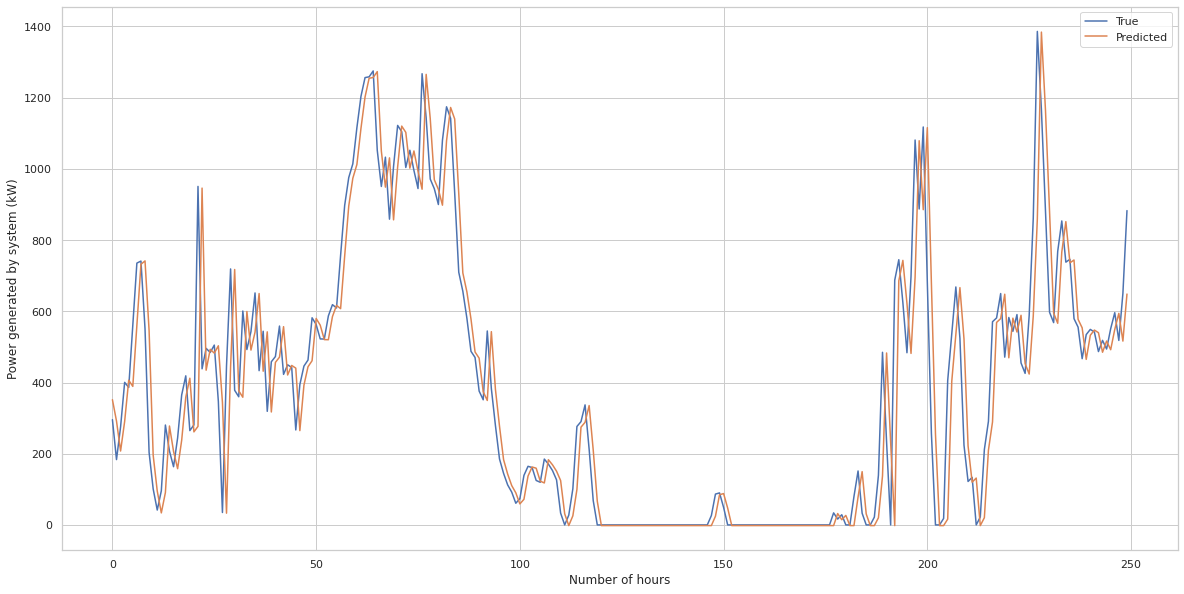

In [61]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
pyplot.figure(figsize=(20,10))
pyplot.plot(expectations_plot[0:250], label="True")
pyplot.plot(predictions_plot[0:250], label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of hours")
pyplot.ylabel("Power generated by system (kW)")
pyplot.show()